In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import psycopg2
import pandas.io.sql as sqlio

In [25]:
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
sys.path.append(os.path.abspath(os.path.join('../src')))

In [28]:
conn = psycopg2.connect(dbname='telecom', user='postgres', host='localhost', password='Nigielove_21')

In [29]:
cur = conn.cursor()

In [30]:
sql = """ SELECT * FROM public.xdr_data  """
data_from_postgres = sqlio.read_sql_query(sql, conn)

In [31]:
# Close the cursor and the connection
cur.close()
conn.close()

In [32]:
data_from_postgres.to_csv('../data/data_from_postgres.csv', index=False)

In [33]:
#df_data = pd.read_csv('../data/data_from_postgres.csv', index_col = False)

In [34]:
df_data = data_from_postgres.copy()

In [35]:
df_data.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,NaN,None,NaN,None,NaN,NaN,NaN,NaN,NaN,None,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [36]:
# number of data points
print(f" There are {df_data.shape[0]} rows and {df_data.shape[1]} columns")

 There are 150001 rows and 55 columns


In [37]:
# Get column names
df_data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [38]:
# Count missing values
df_data.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [39]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [40]:
## Checking for doublicate values

In [41]:
duplicated_entries = df_data[df_data.duplicated()]
duplicated_entries.shape

(0, 55)

In [42]:
# Skewnes we can do it either graphically or compute the skewness 

In [21]:
skewness = df_data.skew(axis=0, skipna=True)
print(skewness)

Bearer Id                                     0.026666
Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952609
IMSI                                         41.045956
MSISDN/Number                               332.155856
IMEI                                          1.071470
Avg RTT DL (ms)                              62.907828
Avg RTT UL (ms)                              28.457415
Avg Bearer TP DL (kbps)                       2.589437
Avg Bearer TP UL (kbps)                       4.503413
TCP DL Retrans. Vol (Bytes)                  15.951809
TCP UL Retrans. Vol (Bytes)                  84.113393
DL TP < 50 Kbps (%)                          -2.297803
50 Kbps < DL TP < 250 Kbps (%)                3.271453
250 Kbps < DL TP < 1 Mbps (%)                 4.566158
DL TP > 1 Mbps (%)                            5.370351
UL TP < 10 Kbps (%)                          -8.985016
10 Kbps < 

<function matplotlib.pyplot.show(close=None, block=None)>

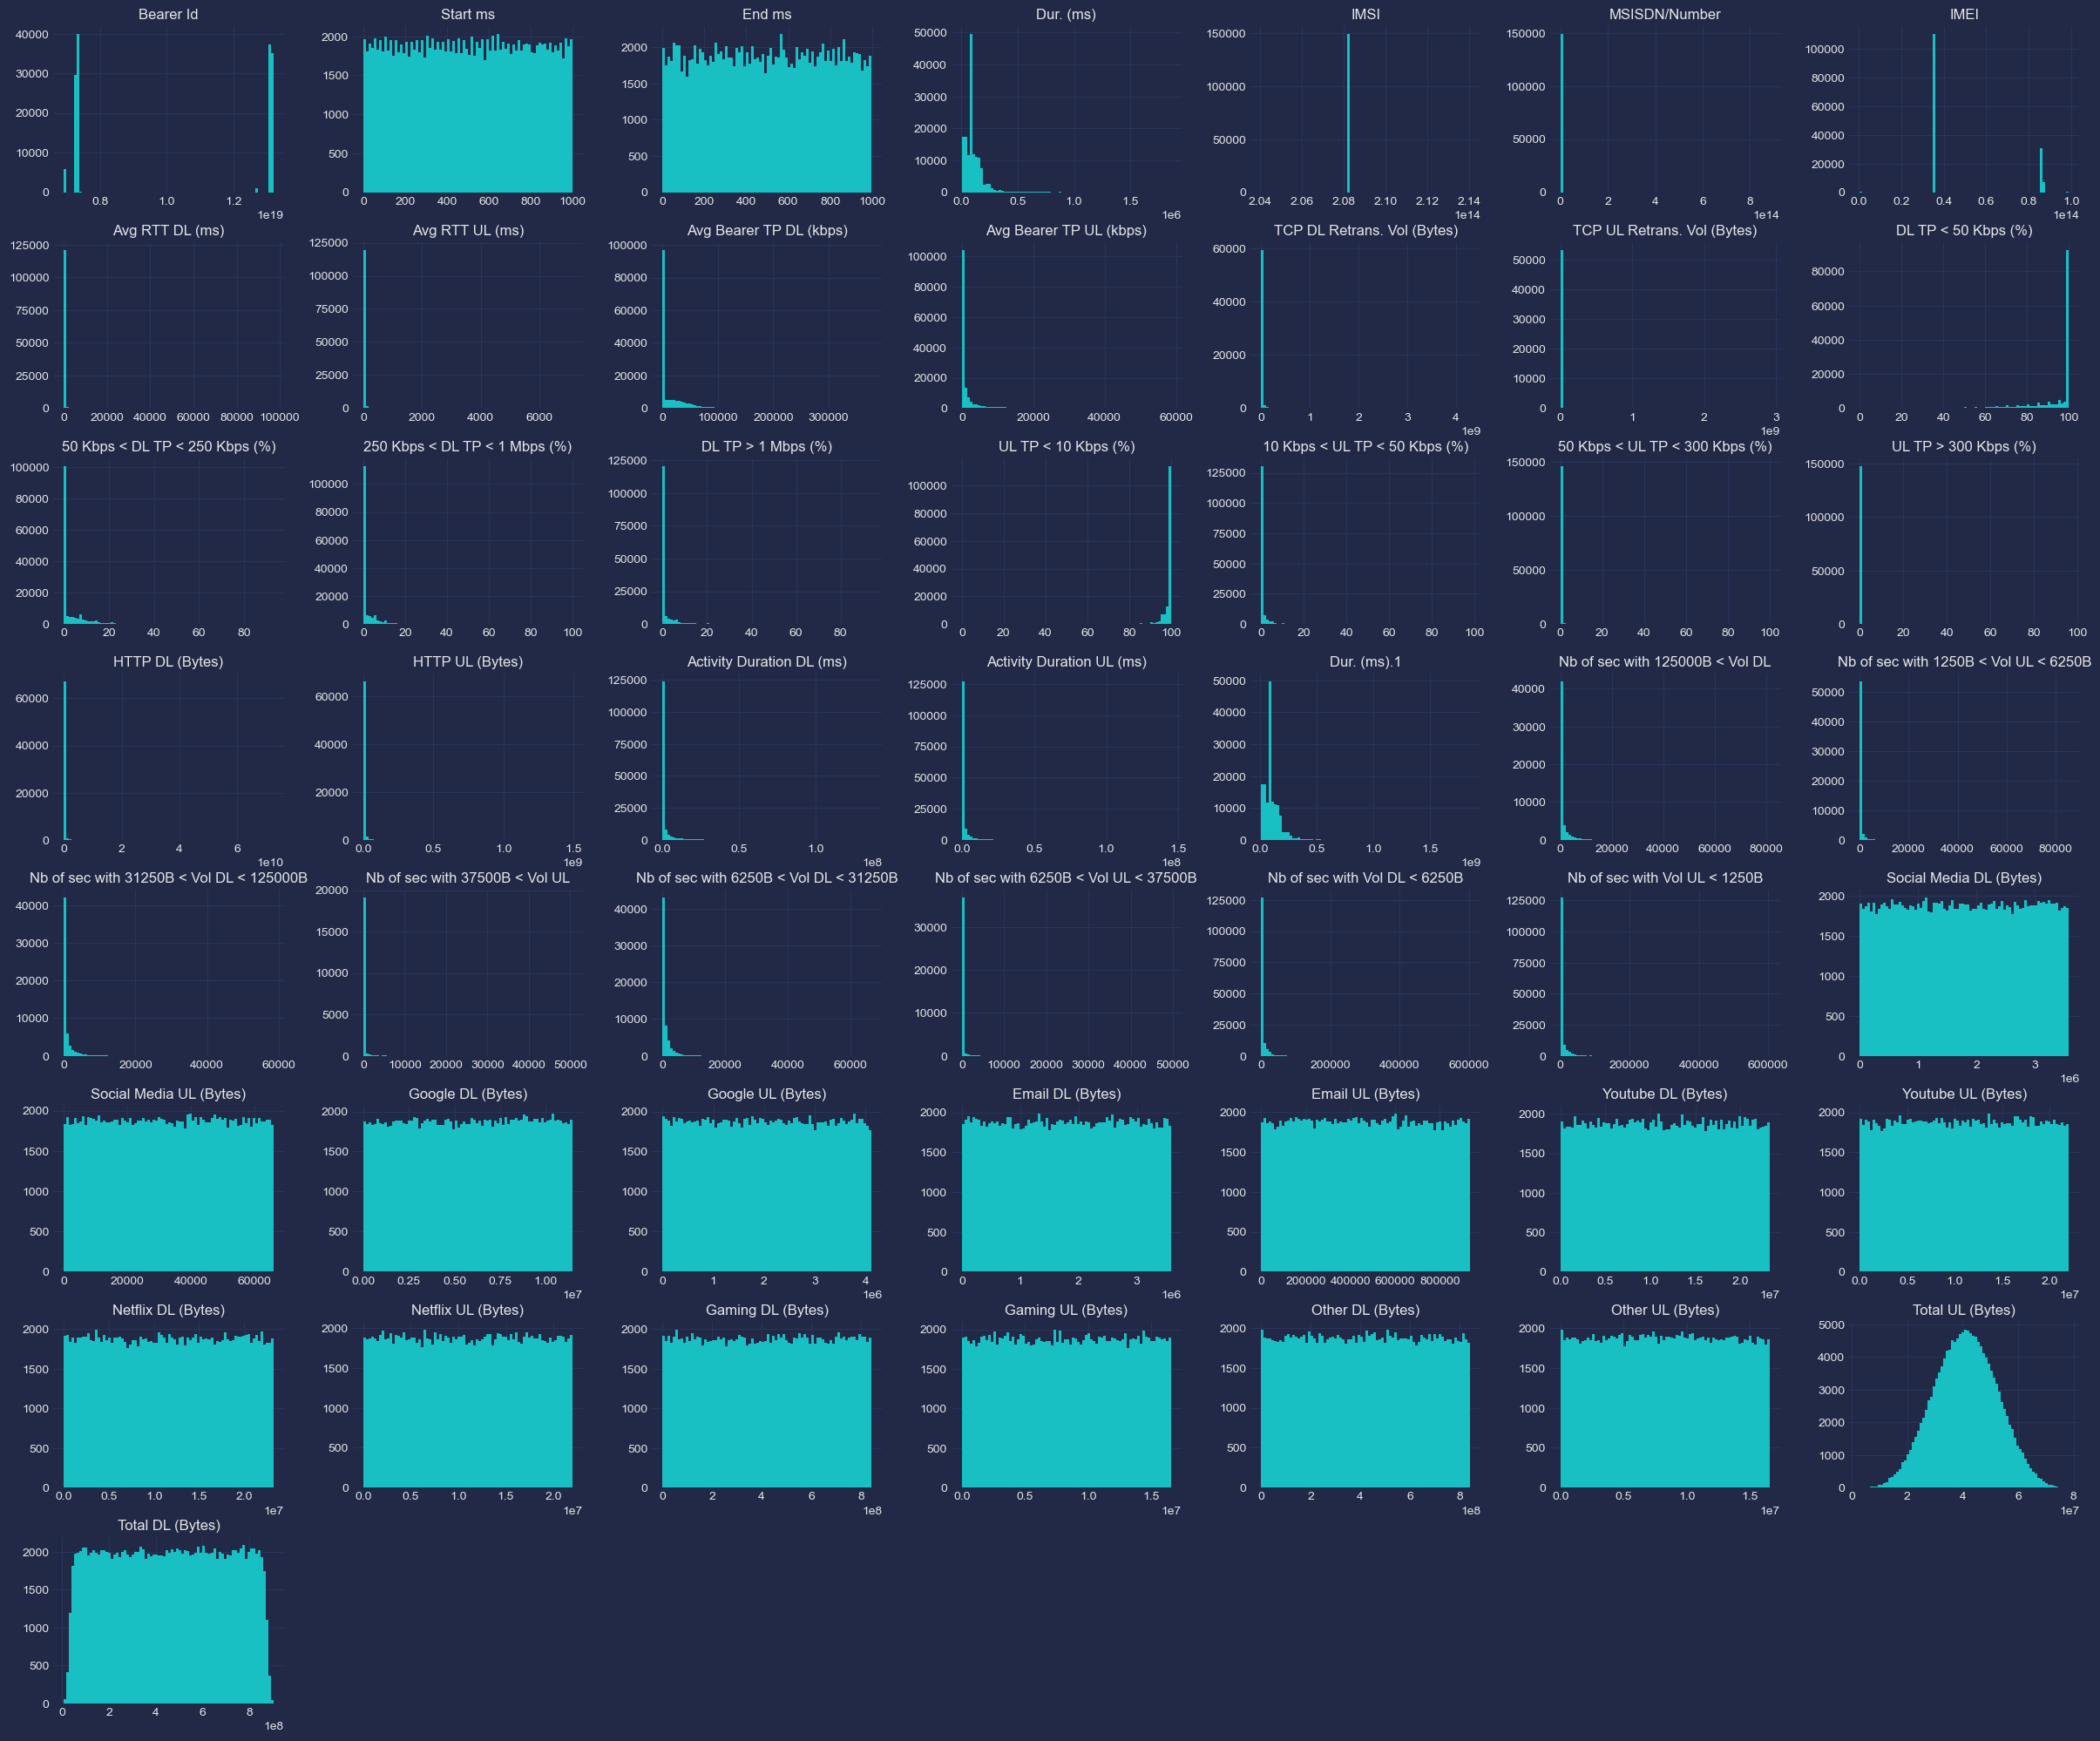

In [43]:
df_data.hist(bins=80, figsize=(30,25))
plt.show

# Getting percentage of missing values

In [44]:
def missing_values_percentage(df):
    total_missing = df.isnull().sum().sort_values(ascending=False)
    percentage_missing = (total_missing / len(df)) * 100
    
    missing_value_df = pd.DataFrame({
        'Total Missing Values': total_missing,
        'Percentage Missing': percentage_missing
    })
    
    return missing_value_df

missing_values_result = missing_values_percentage(df_data)

In [45]:
missing_values_result

,Total Missing Values,Percentage Missing
Nb of sec with 37500B < Vol UL,130254,86.835421
Nb of sec with 6250B < Vol UL < 37500B,111843,74.561503
Nb of sec with 125000B < Vol DL,97538,65.024900
TCP UL Retrans. Vol (Bytes),96649,64.432237
Nb of sec with 31250B < Vol DL < 125000B,93586,62.390251
Nb of sec with 1250B < Vol UL < 6250B,92894,61.928920
Nb of sec with 6250B < Vol DL < 31250B,88317,58.877607
TCP DL Retrans. Vol (Bytes),88146,58.763608
HTTP UL (Bytes),81810,54.539636
HTTP DL (Bytes),81474,54.315638


In [59]:
total_missing_values = (missing_values_result['Total Missing Values'].sum()/df_data.size)*100
print("Percentage of the toal missing value in the data is ",round(total_missing_values,2),'%')

Percentage of the toal missing value in the data is  12.5 %


### percentage of the total missing value in the data is around 12.5%

### Clean the column names

In [60]:
df_data.columns = [column.replace(' ', '_').lower() for column in df_data.columns]

In [61]:
list(df_data.columns)

['bearer_id',
 'start',
 'start_ms',
 'end',
 'end_ms',
 'dur._(ms)',
 'imsi',
 'msisdn/number',
 'imei',
 'last_location_name',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'tcp_dl_retrans._vol_(bytes)',
 'tcp_ul_retrans._vol_(bytes)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'http_dl_(bytes)',
 'http_ul_(bytes)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'dur._(ms).1',
 'handset_manufacturer',
 'handset_type',
 'nb_of_sec_with_125000b_<_vol_dl',
 'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
 'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
 'nb_of_sec_with_37500b_<_vol_ul',
 'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
 'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'socia

## Drop dublicates

In [62]:
df_data.drop_duplicates(inplace=True)

In [63]:
df_data.shape

(150001, 55)

# No duplicate values found

## Handeling missing values

## 1. Delete features with more than 30% of missingness

In [68]:
df_data = df_data[df_data.columns[df_data.isnull().mean()< 0.3]]

In [69]:
df_data.shape

(150001, 45)

In [70]:
df_data.isnull().sum()

bearer_id                           991
start                                 1
start_ms                              1
end                                   1
end_ms                                1
dur._(ms)                             1
imsi                                570
msisdn/number                      1066
imei                                572
last_location_name                 1153
avg_rtt_dl_(ms)                   27829
avg_rtt_ul_(ms)                   27812
avg_bearer_tp_dl_(kbps)               1
avg_bearer_tp_ul_(kbps)               1
dl_tp_<_50_kbps_(%)                 754
50_kbps_<_dl_tp_<_250_kbps_(%)      754
250_kbps_<_dl_tp_<_1_mbps_(%)       754
dl_tp_>_1_mbps_(%)                  754
ul_tp_<_10_kbps_(%)                 792
10_kbps_<_ul_tp_<_50_kbps_(%)       792
50_kbps_<_ul_tp_<_300_kbps_(%)      792
ul_tp_>_300_kbps_(%)                792
activity_duration_dl_(ms)             1
activity_duration_ul_(ms)             1
dur._(ms).1                           1


From the above we can see that 10 columns have 30% or greater missing values

## 2. Imputation.
Filling missing values in a variable by reasonable approximations using median of the variable to allow machine learning models to work

### Numeric Columns

In [75]:
numeric_columns = df_data.select_dtypes(include='number').columns.tolist()
# fill null values with mean of the column
for col in numeric_columns:
    if df_data[col].isnull().any():
        df_data[col].fillna(df_data[col].median(), inplace=True) 

In [76]:
df_data.isnull().sum()

bearer_id                            0
start                                1
start_ms                             0
end                                  1
end_ms                               0
dur._(ms)                            0
imsi                                 0
msisdn/number                        0
imei                                 0
last_location_name                1153
avg_rtt_dl_(ms)                      0
avg_rtt_ul_(ms)                      0
avg_bearer_tp_dl_(kbps)              0
avg_bearer_tp_ul_(kbps)              0
dl_tp_<_50_kbps_(%)                  0
50_kbps_<_dl_tp_<_250_kbps_(%)       0
250_kbps_<_dl_tp_<_1_mbps_(%)        0
dl_tp_>_1_mbps_(%)                   0
ul_tp_<_10_kbps_(%)                  0
10_kbps_<_ul_tp_<_50_kbps_(%)        0
50_kbps_<_ul_tp_<_300_kbps_(%)       0
ul_tp_>_300_kbps_(%)                 0
activity_duration_dl_(ms)            0
activity_duration_ul_(ms)            0
dur._(ms).1                          0
handset_manufacturer     

## Cattegorical Columns

In [77]:
categorical_columns = df_data.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    if df_data[col].isnull().any():
        mode_value = df_data[col].mode()[0]  # Calculate the mode (most frequent value)
        df_data[col].fillna(mode_value, inplace=True)

In [78]:
df_data[numeric_columns].isnull().sum()

bearer_id                         0
start_ms                          0
end_ms                            0
dur._(ms)                         0
imsi                              0
msisdn/number                     0
imei                              0
avg_rtt_dl_(ms)                   0
avg_rtt_ul_(ms)                   0
avg_bearer_tp_dl_(kbps)           0
avg_bearer_tp_ul_(kbps)           0
dl_tp_<_50_kbps_(%)               0
50_kbps_<_dl_tp_<_250_kbps_(%)    0
250_kbps_<_dl_tp_<_1_mbps_(%)     0
dl_tp_>_1_mbps_(%)                0
ul_tp_<_10_kbps_(%)               0
10_kbps_<_ul_tp_<_50_kbps_(%)     0
50_kbps_<_ul_tp_<_300_kbps_(%)    0
ul_tp_>_300_kbps_(%)              0
activity_duration_dl_(ms)         0
activity_duration_ul_(ms)         0
dur._(ms).1                       0
nb_of_sec_with_vol_dl_<_6250b     0
nb_of_sec_with_vol_ul_<_1250b     0
social_media_dl_(bytes)           0
social_media_ul_(bytes)           0
google_dl_(bytes)                 0
google_ul_(bytes)           

In [79]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       150001 non-null  float64
 1   start                           150001 non-null  object 
 2   start_ms                        150001 non-null  float64
 3   end                             150001 non-null  object 
 4   end_ms                          150001 non-null  float64
 5   dur._(ms)                       150001 non-null  float64
 6   imsi                            150001 non-null  float64
 7   msisdn/number                   150001 non-null  float64
 8   imei                            150001 non-null  float64
 9   last_location_name              150001 non-null  object 
 10  avg_rtt_dl_(ms)                 150001 non-null  float64
 11  avg_rtt_ul_(ms)                 150001 non-null  float64
 12  avg_bearer_tp_dl

In [80]:
df_data.shape

(150001, 45)

# Outliers

To detect the outliers we needed to plot each colum as a boxplot. In addition, to include a titilefor each plot first we read the Field Description file and clean the column names as we did for the data above. This will help us to get the title for the box plot

In [81]:
col_description = pd.read_excel("../data/Field Descriptions.xlsx", index_col=False)
col_description.head()

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)


In [82]:
col_description.tail()

,Fields,Description
51,Gaming UL (Bytes),Gaming data volume (in Bytes) sent by the MS d...
52,Other DL,Other data volume (in Bytes) received by the M...
53,Other UL,Other data volume (in Bytes) sent by the MS du...
54,Total DL (Bytes),Data volume (in Bytes) received by the MS duri...
55,Total UL (Bytes),Data volume (in Bytes) sent by the MS during t...


In [83]:
col_description.loc[52,'Fields'] = 'Other DL (bytes)'
col_description.loc[53,'Fields'] = 'Other UL (bytes)'

### Cleaning the Fields for matching with our data column names

In [84]:
numeric_columns

['bearer_id',
 'start_ms',
 'end_ms',
 'dur._(ms)',
 'imsi',
 'msisdn/number',
 'imei',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'dur._(ms).1',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'social_media_dl_(bytes)',
 'social_media_ul_(bytes)',
 'google_dl_(bytes)',
 'google_ul_(bytes)',
 'email_dl_(bytes)',
 'email_ul_(bytes)',
 'youtube_dl_(bytes)',
 'youtube_ul_(bytes)',
 'netflix_dl_(bytes)',
 'netflix_ul_(bytes)',
 'gaming_dl_(bytes)',
 'gaming_ul_(bytes)',
 'other_dl_(bytes)',
 'other_ul_(bytes)',
 'total_ul_(bytes)',
 'total_dl_(bytes)']

In [85]:
col_description["Fields"] = col_description["Fields"].apply(lambda x: x.replace(' ', '_').lower())

#### Defining a a function for ploting a boxplot for a column in the DataFrame

In [86]:
def boxplot(df: pd.DataFrame, x: str, title: str)-> None:
    plt.figure(figsize=(12, 4))
    ax = sns.boxplot(data=df, x=x)
    plt.title(title, size=16)
    ax.tick_params(axis='x', rotation=45)
    figname = x.replace('/','_').replace('.','')
    #plt.savefig(f'../assets/outlier_plots/{figname}.png')
    plt.show()    

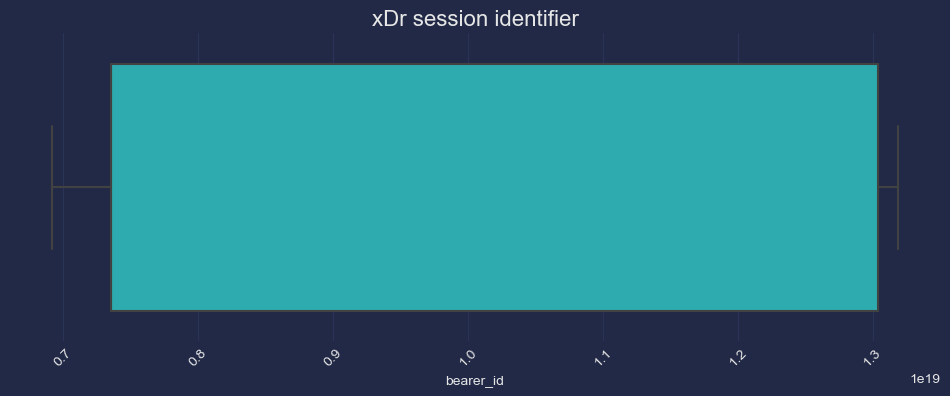

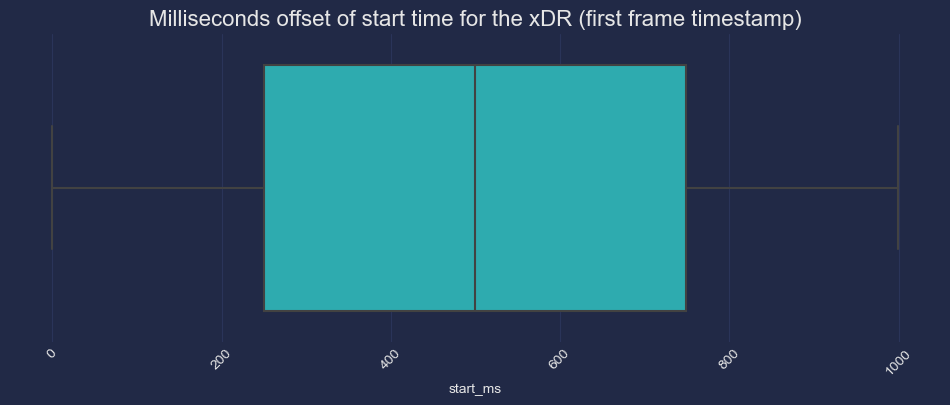

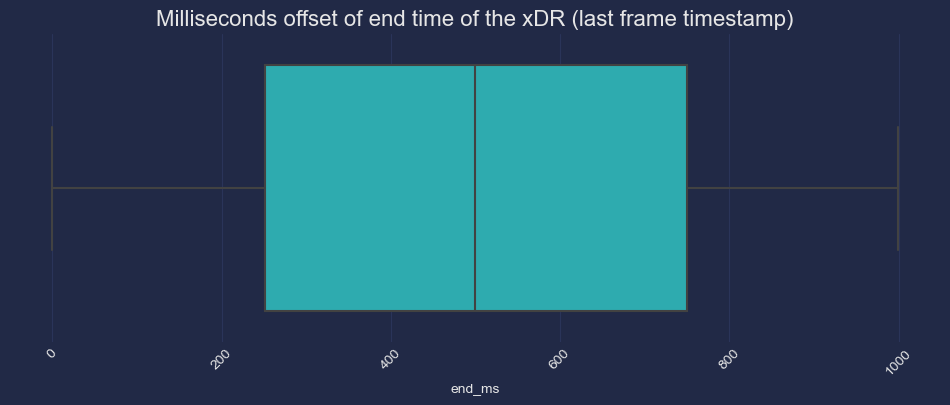

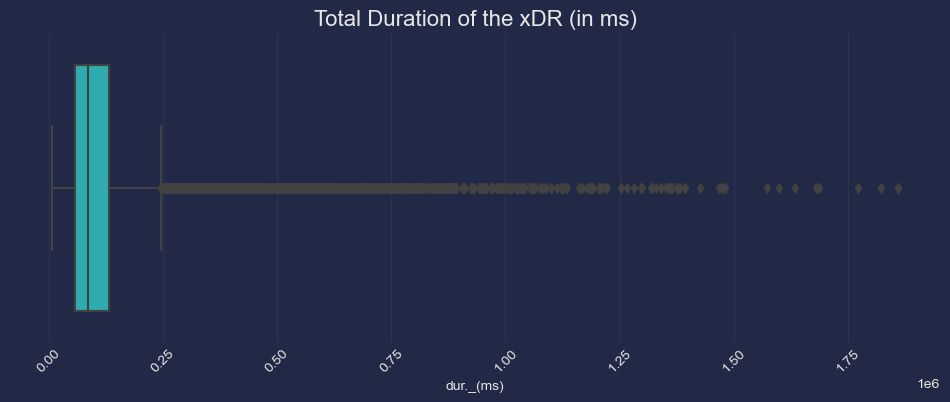

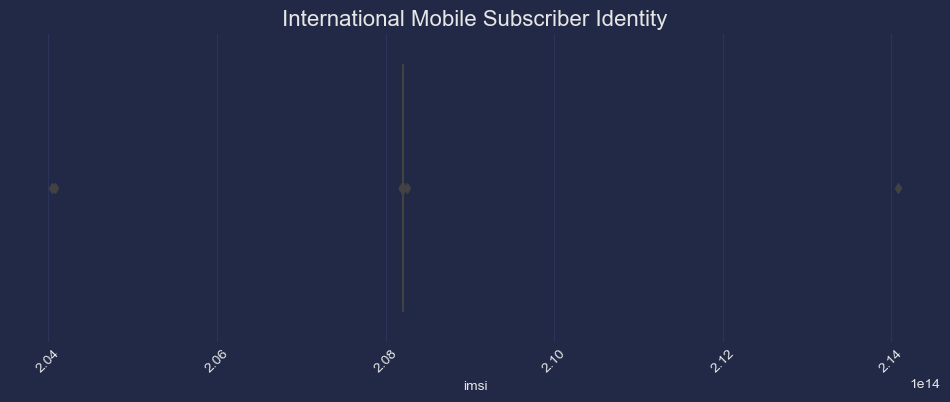

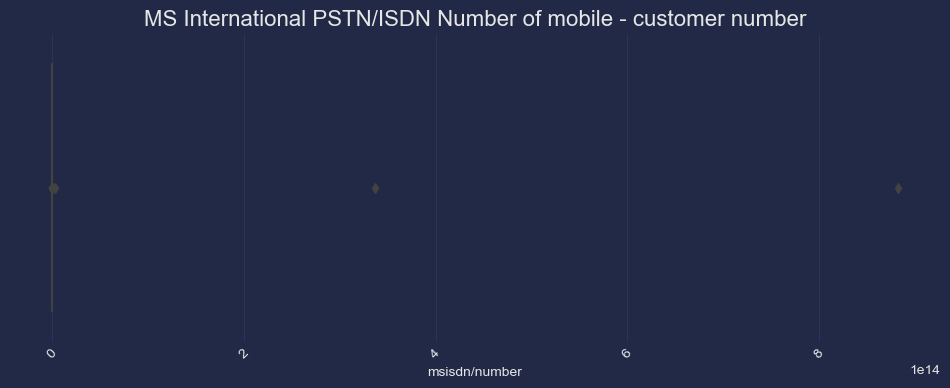

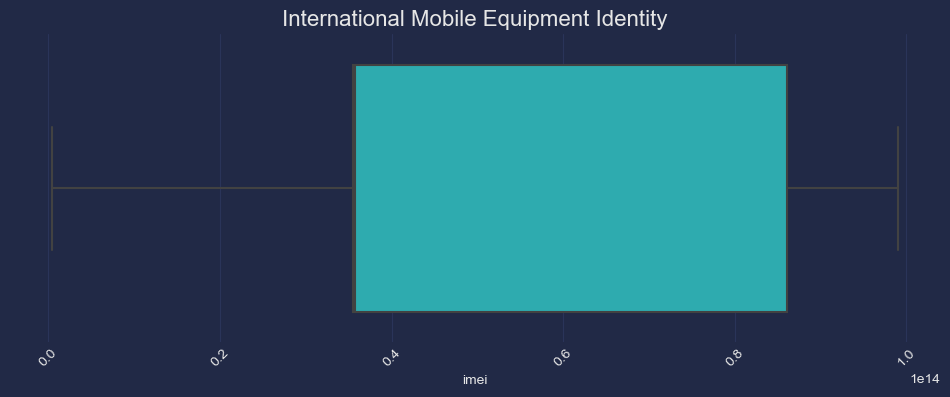

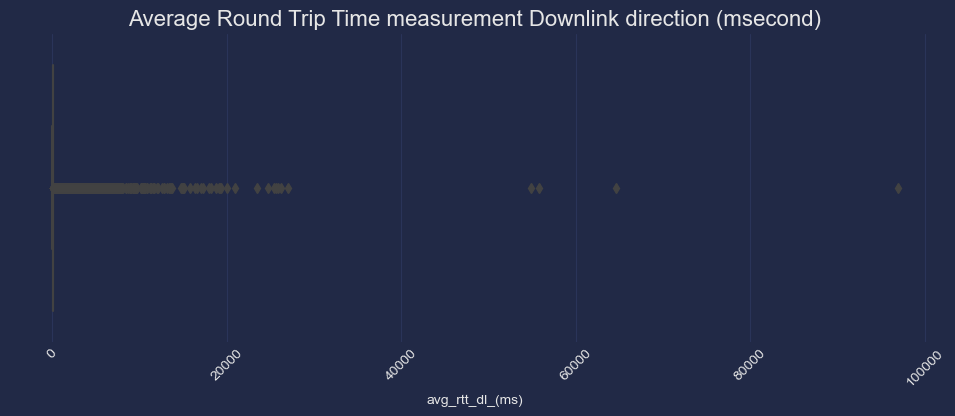

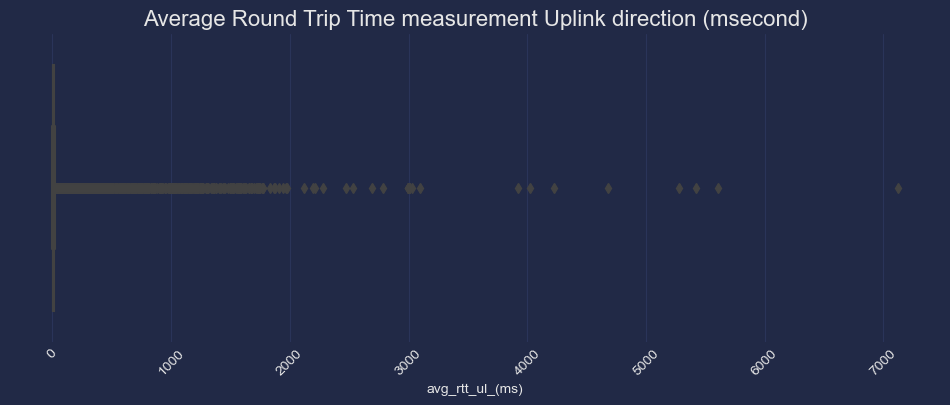

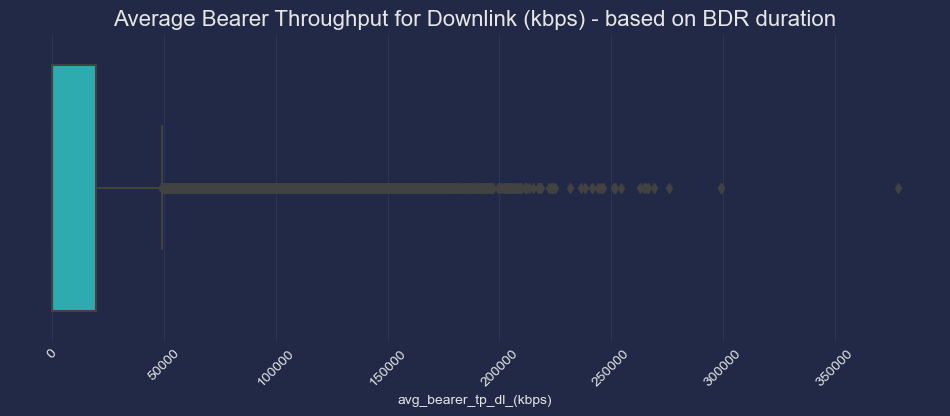

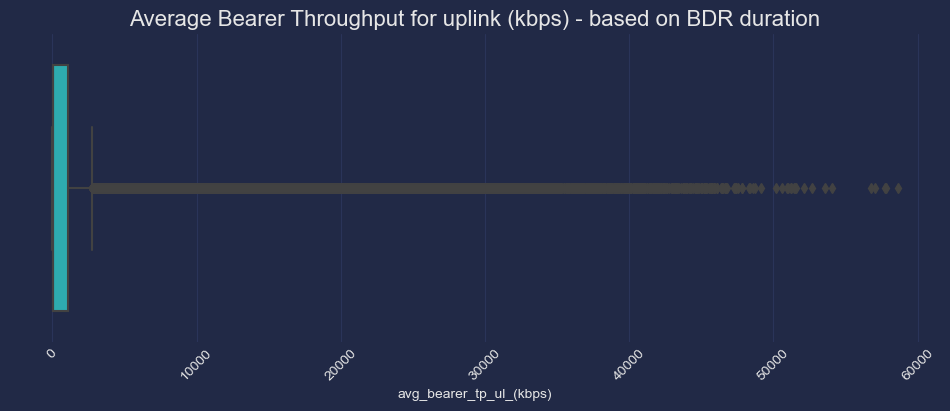

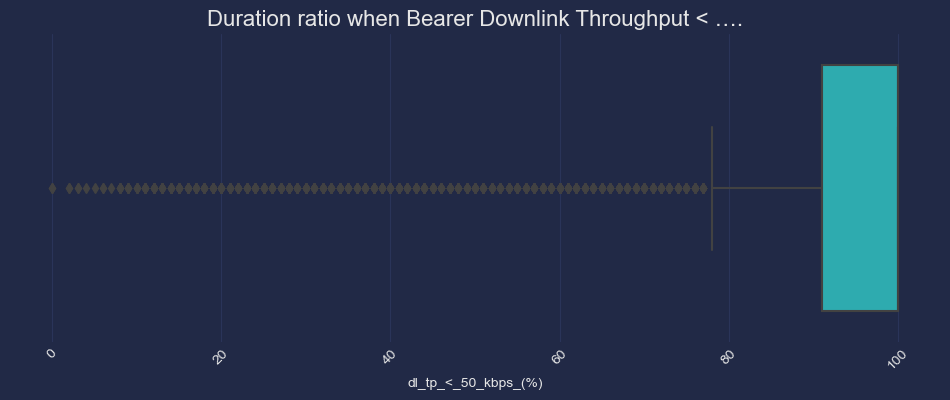

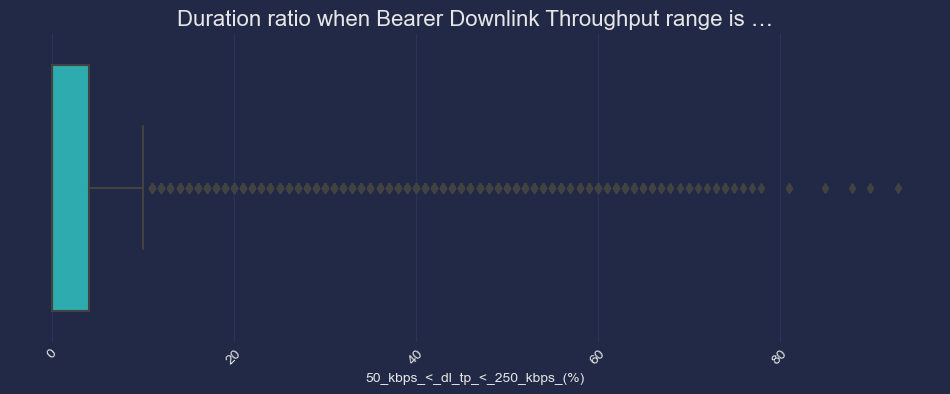

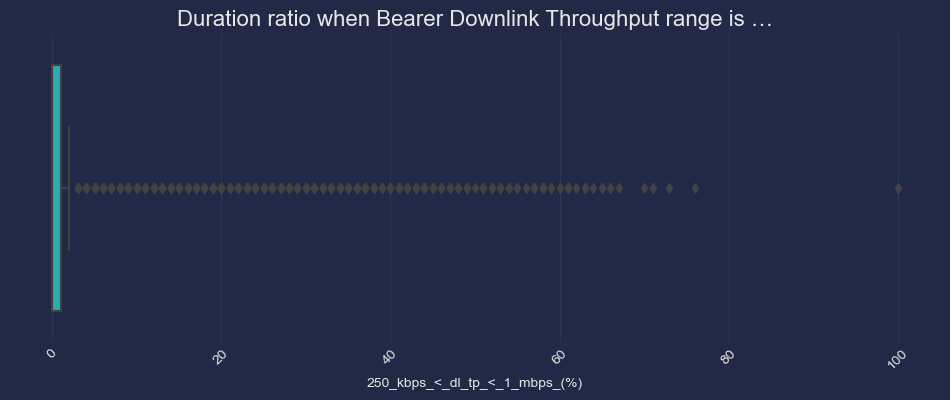

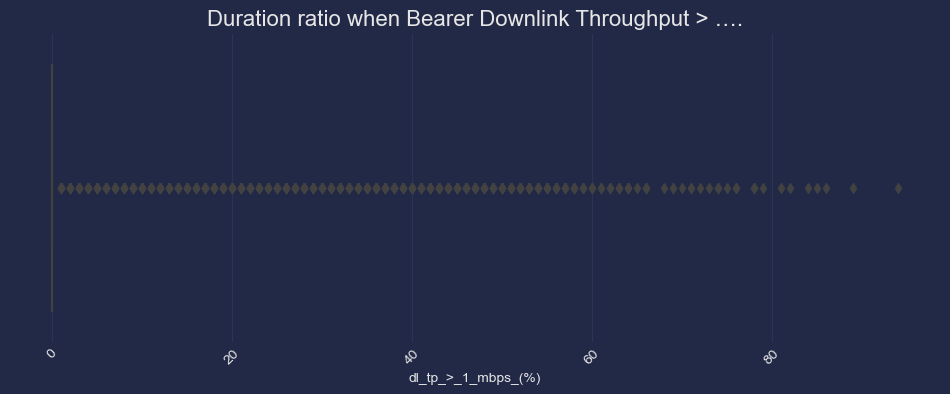

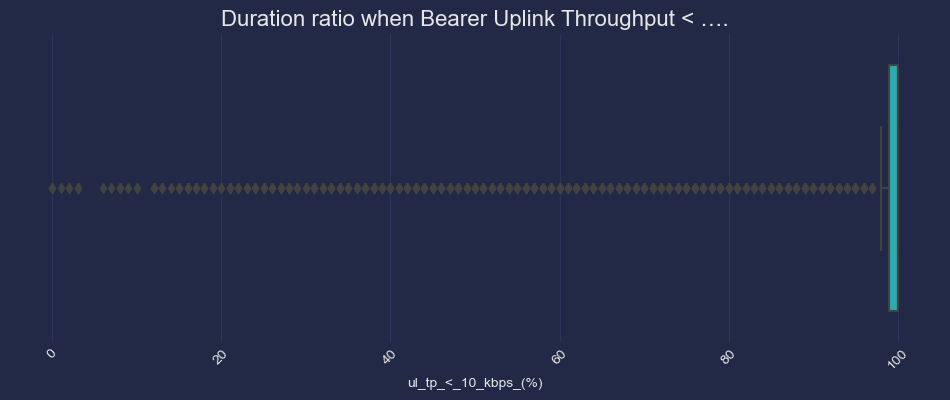

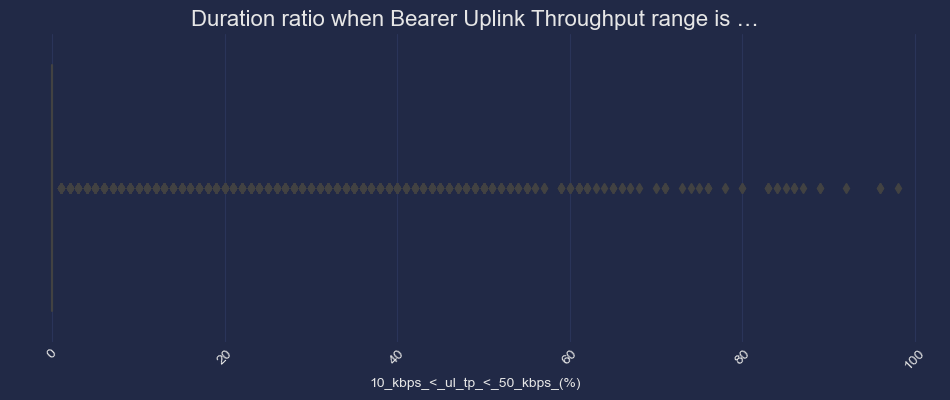

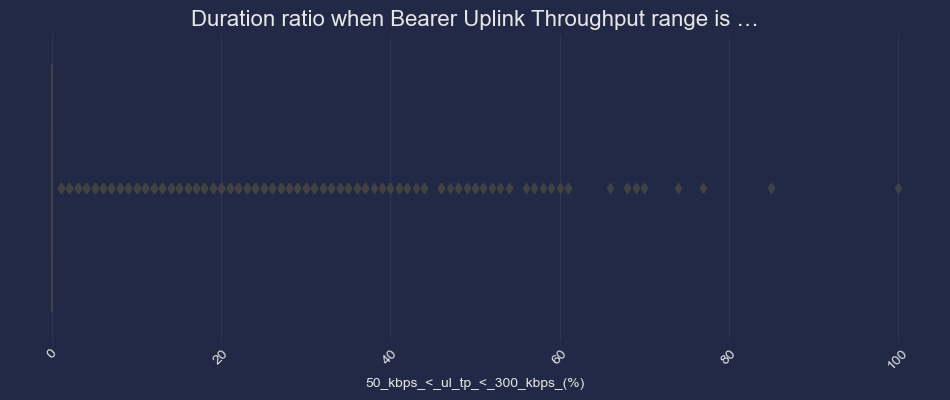

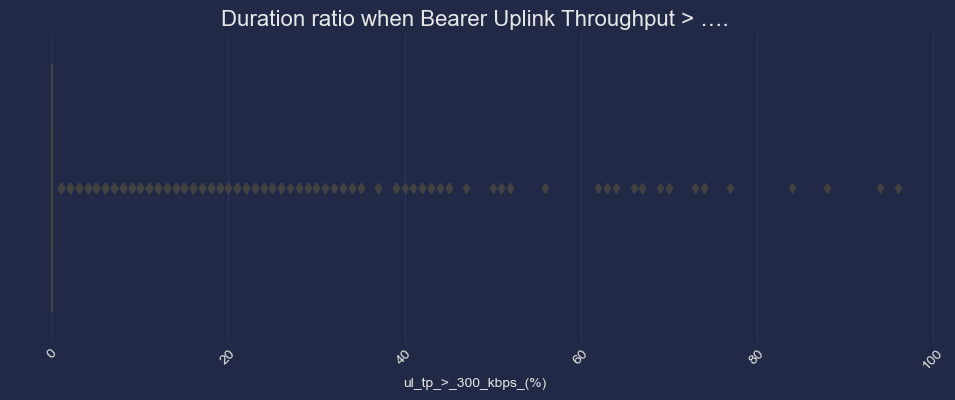

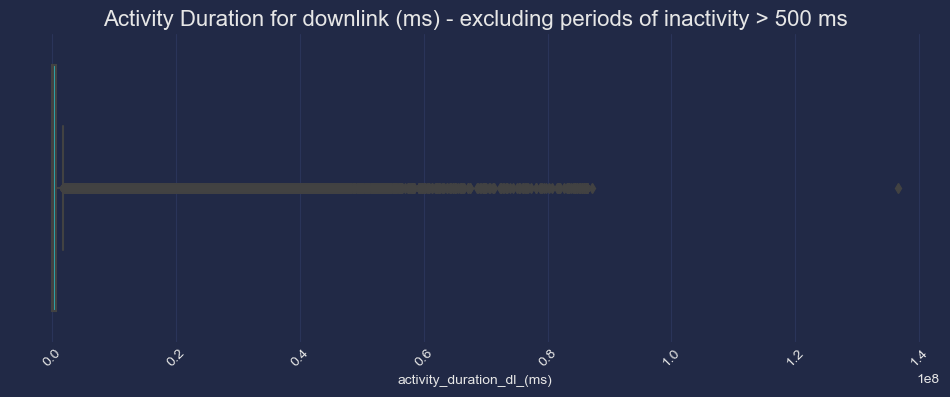

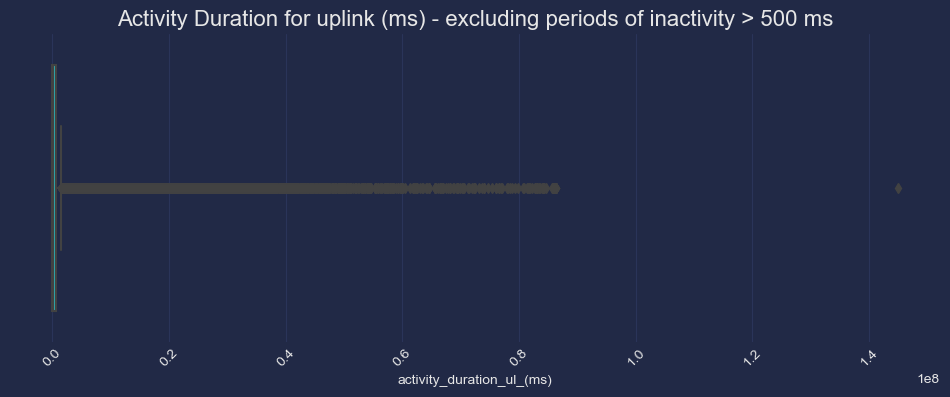

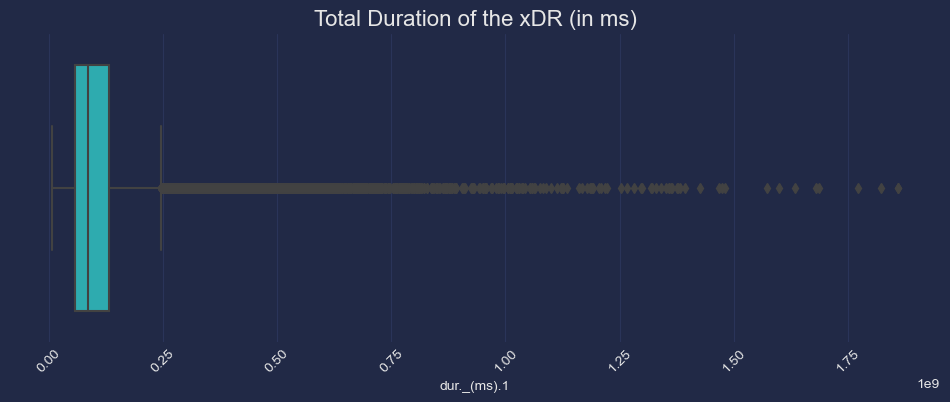

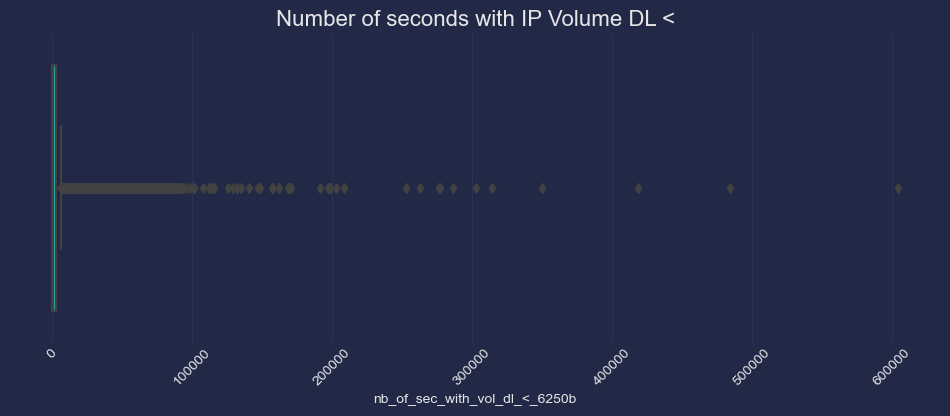

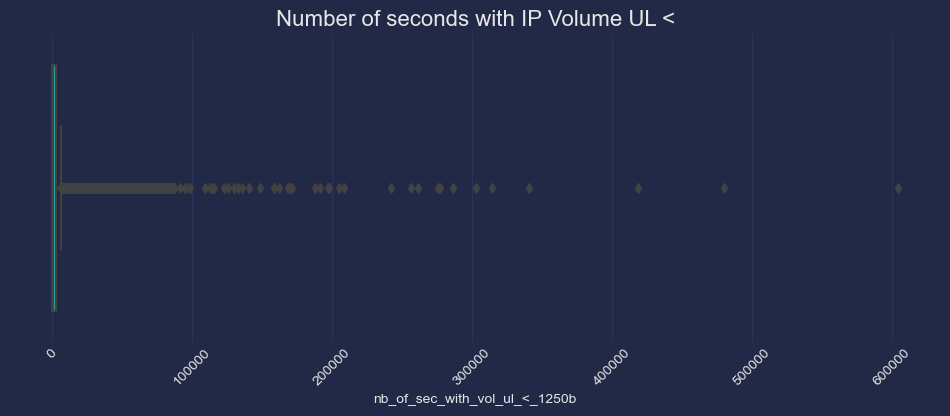

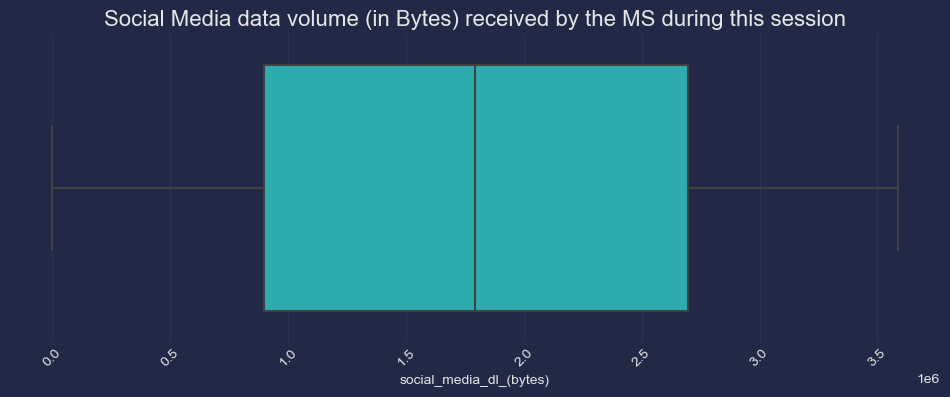

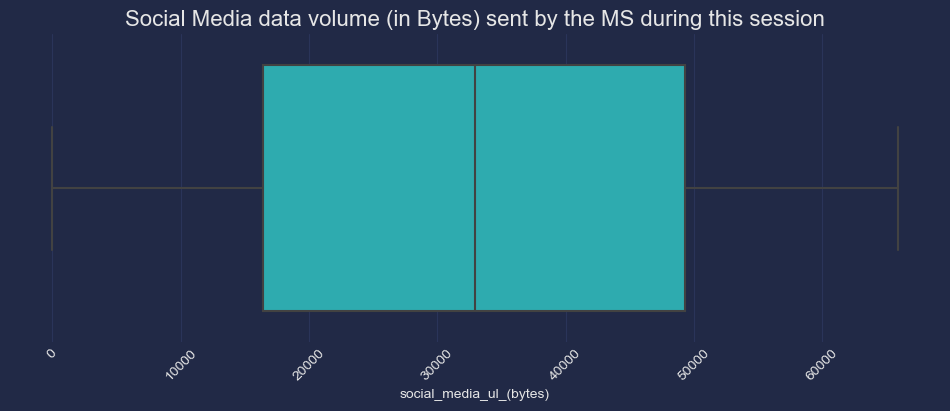

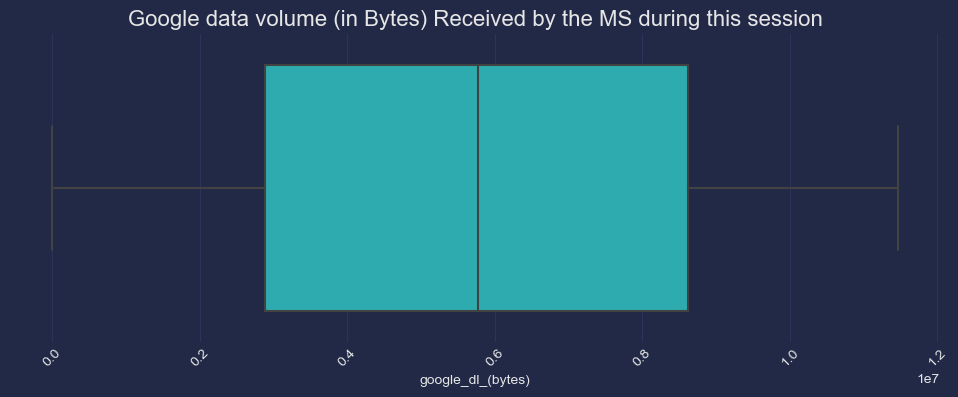

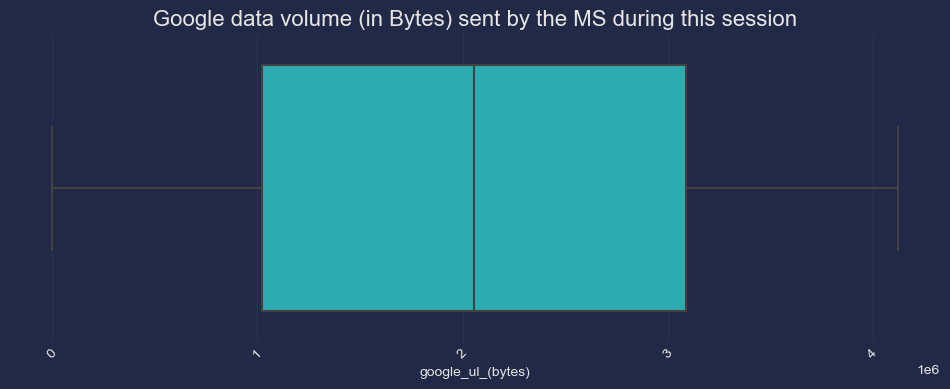

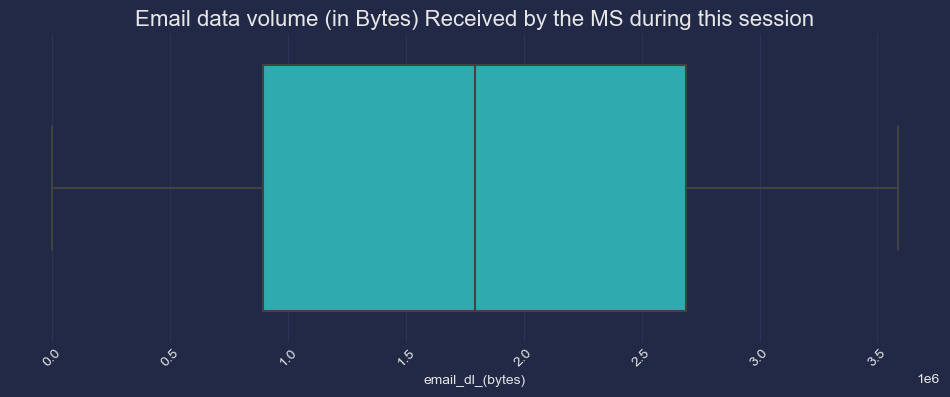

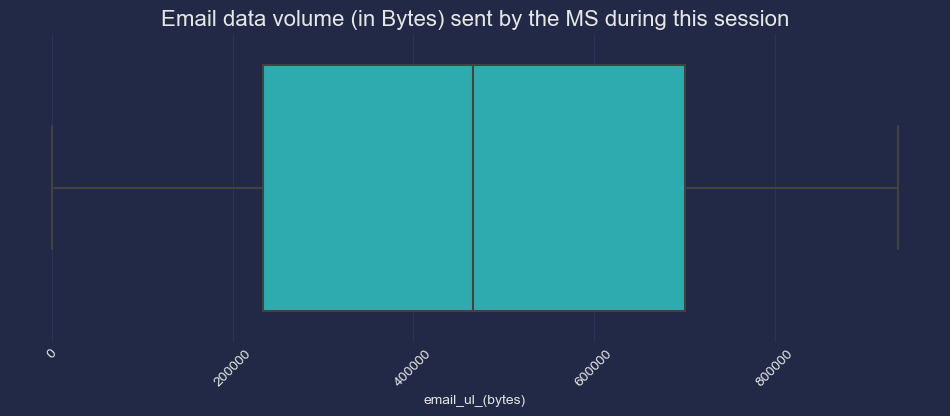

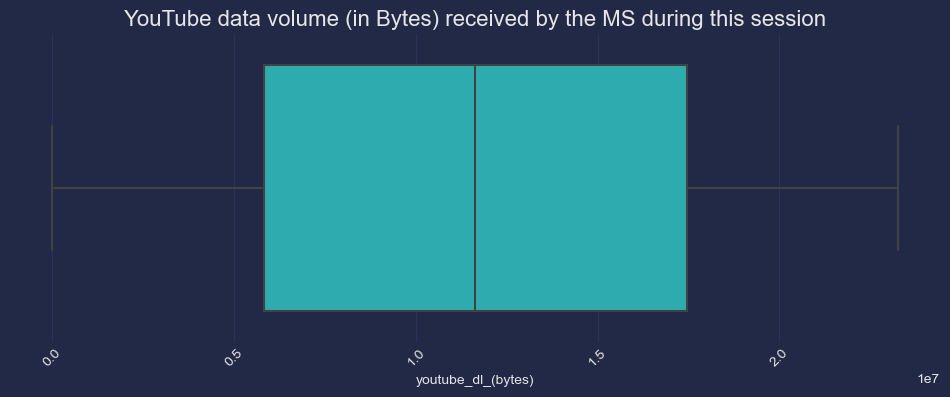

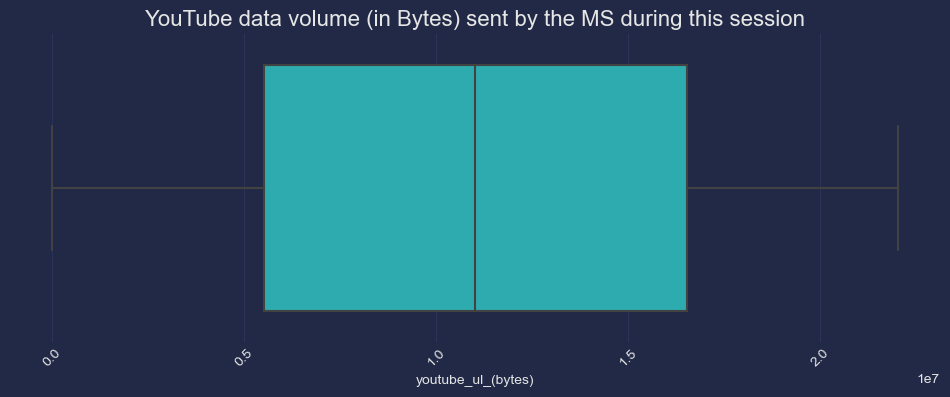

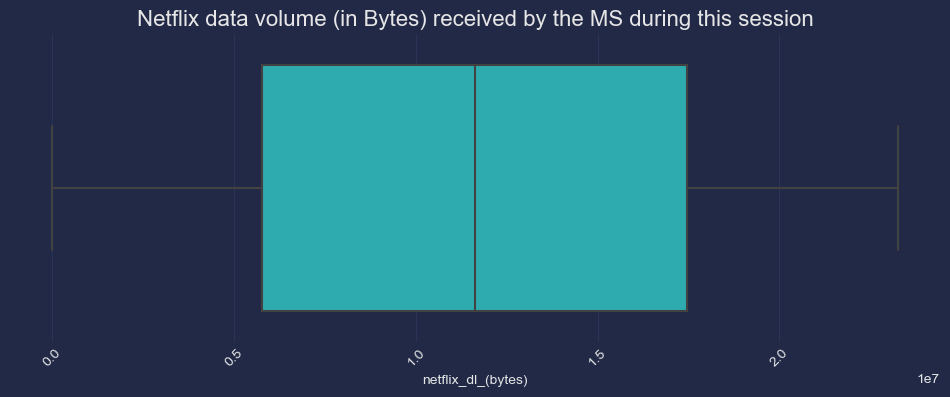

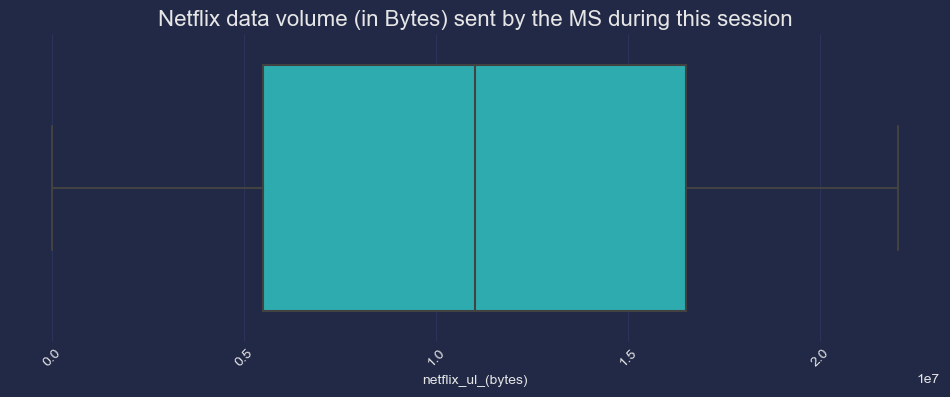

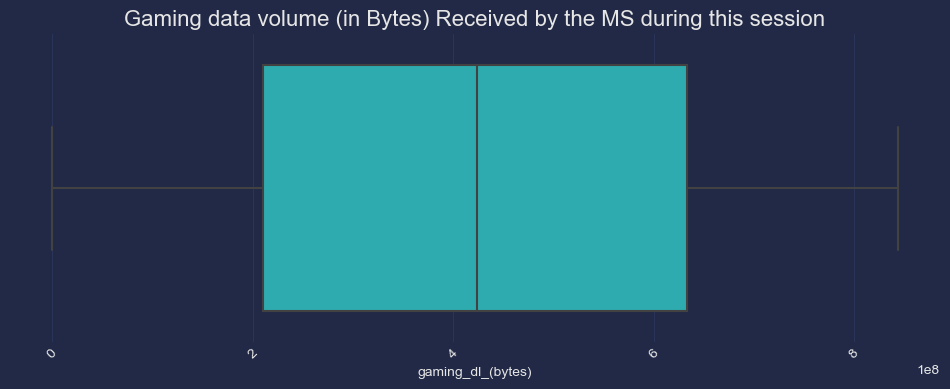

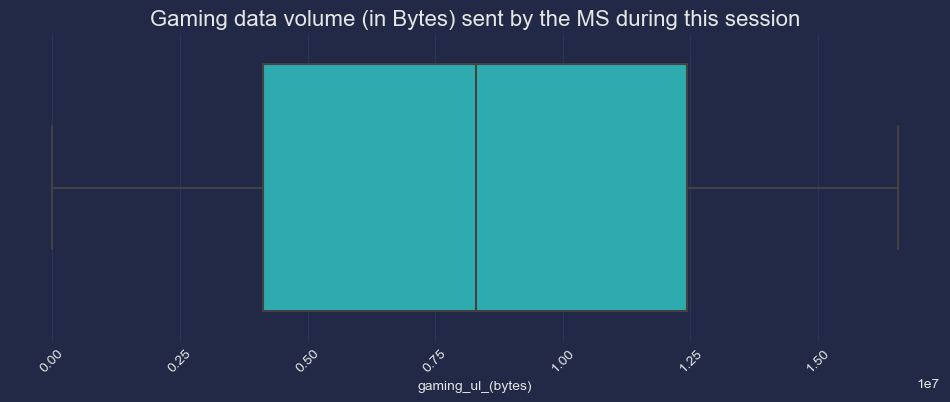

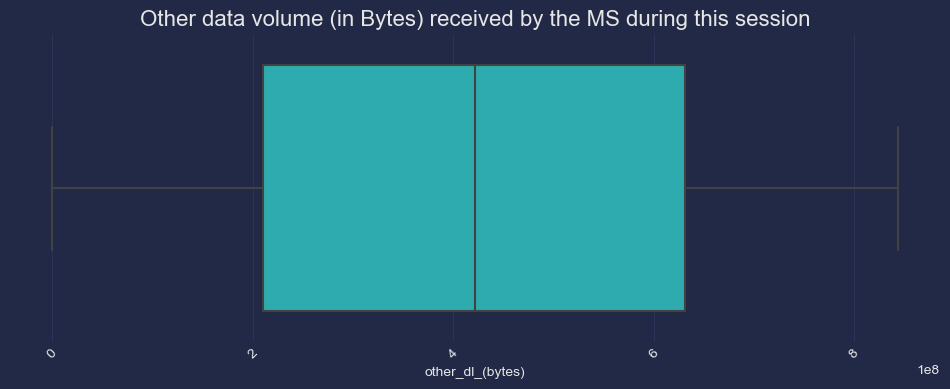

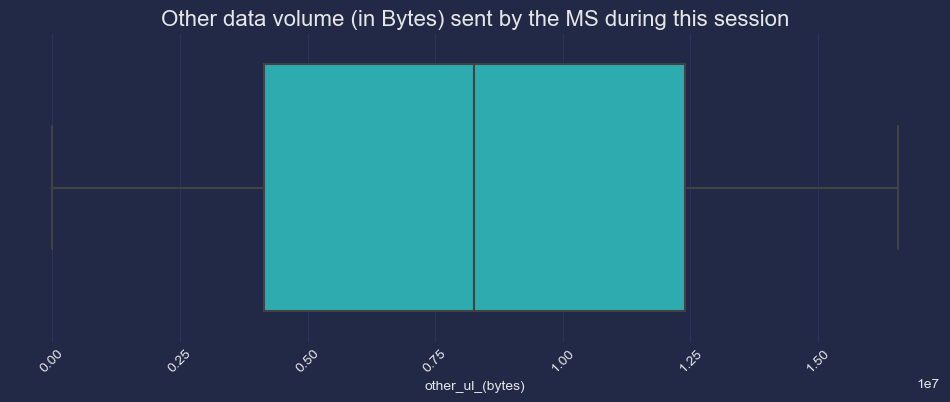

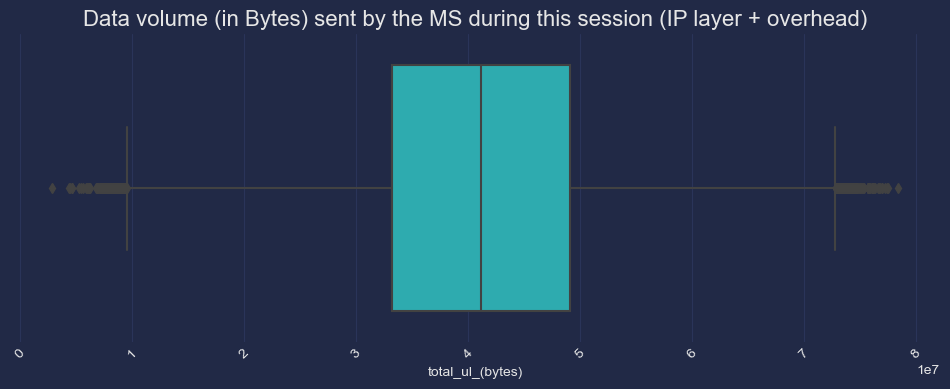

In [87]:
for col in numeric_columns[:-1]:
    boxplot(df_data, col, col_description[col_description['Fields']==col]['Description'].values[0])

## The observation indicates that the majority of the columns contain outlier values.

Get Outlier overview

Calculate number of outliers for each numeric column

In [88]:
dlist = ['bearer_id', 'start_ms', 'end_ms', 'imsi', 'msisdn/number', 'imei']

In [89]:
num_cols = [el for el in numeric_columns if el not in dlist]

In [90]:
 def num_outliers(col):
    thres = 3
    mean = np.mean(col)
    std = np.std(col)
    # print(mean, std)
    n = 0
    for i in col:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            n +=1
    return n


In [91]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in num_cols:
    print(f"Z-scores of {col}", num_outliers(df_data[col]) )

Z-scores of dur._(ms) 2214
Z-scores of avg_rtt_dl_(ms) 818
Z-scores of avg_rtt_ul_(ms) 751
Z-scores of avg_bearer_tp_dl_(kbps) 2983
Z-scores of avg_bearer_tp_ul_(kbps) 4269
Z-scores of dl_tp_<_50_kbps_(%) 3467
Z-scores of 50_kbps_<_dl_tp_<_250_kbps_(%) 3462
Z-scores of 250_kbps_<_dl_tp_<_1_mbps_(%) 3147
Z-scores of dl_tp_>_1_mbps_(%) 3464
Z-scores of ul_tp_<_10_kbps_(%) 2199
Z-scores of 10_kbps_<_ul_tp_<_50_kbps_(%) 2018
Z-scores of 50_kbps_<_ul_tp_<_300_kbps_(%) 1029
Z-scores of ul_tp_>_300_kbps_(%) 749
Z-scores of activity_duration_dl_(ms) 3558
Z-scores of activity_duration_ul_(ms) 2958
Z-scores of dur._(ms).1 2214
Z-scores of nb_of_sec_with_vol_dl_<_6250b 3010
Z-scores of nb_of_sec_with_vol_ul_<_1250b 3708
Z-scores of social_media_dl_(bytes) 0
Z-scores of social_media_ul_(bytes) 0
Z-scores of google_dl_(bytes) 0
Z-scores of google_ul_(bytes) 0
Z-scores of email_dl_(bytes) 0
Z-scores of email_ul_(bytes) 0
Z-scores of youtube_dl_(bytes) 0
Z-scores of youtube_ul_(bytes) 0
Z-scores of n

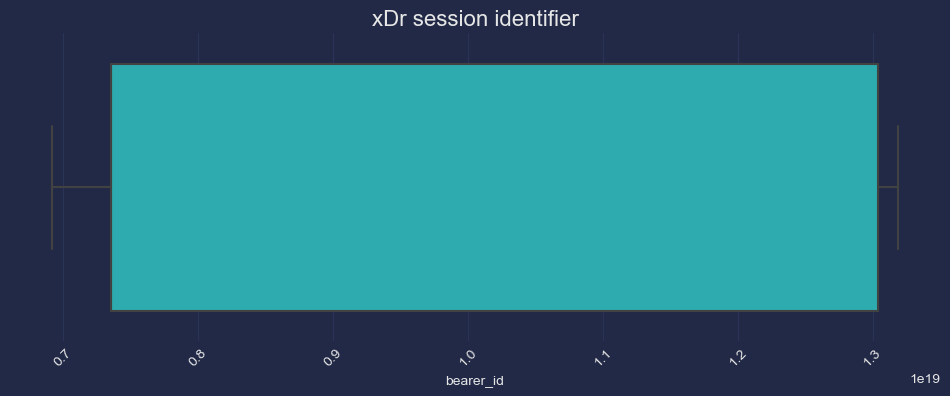

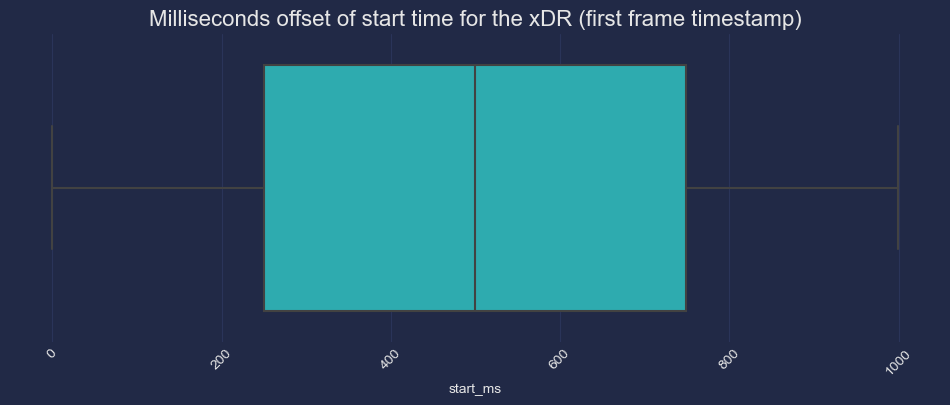

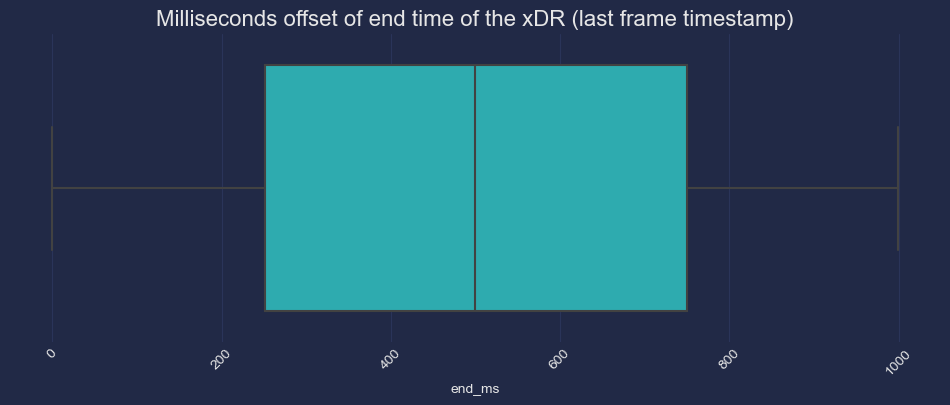

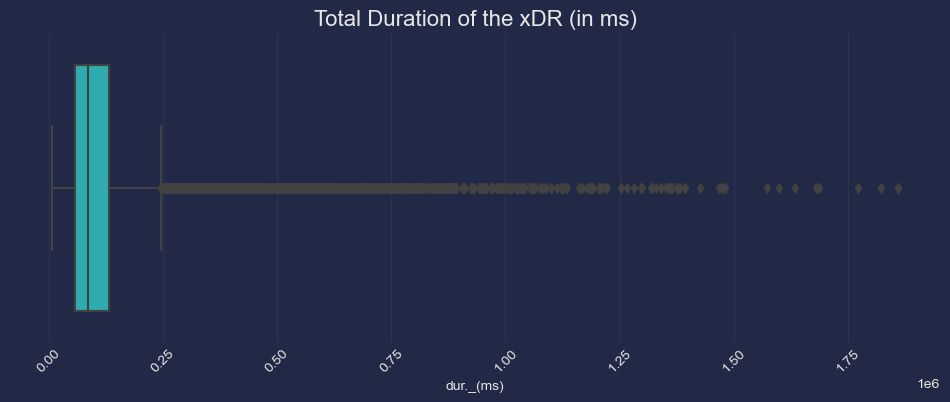

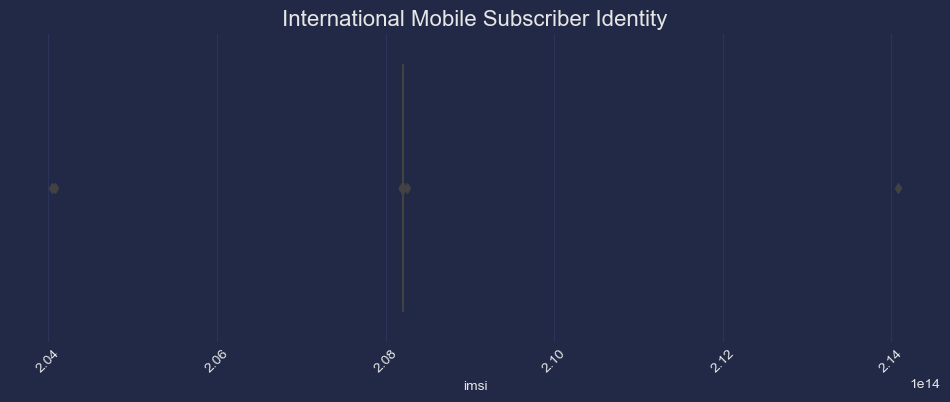

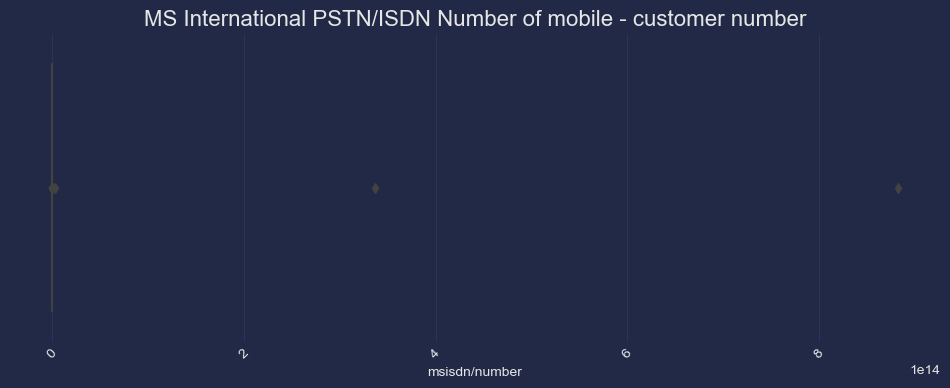

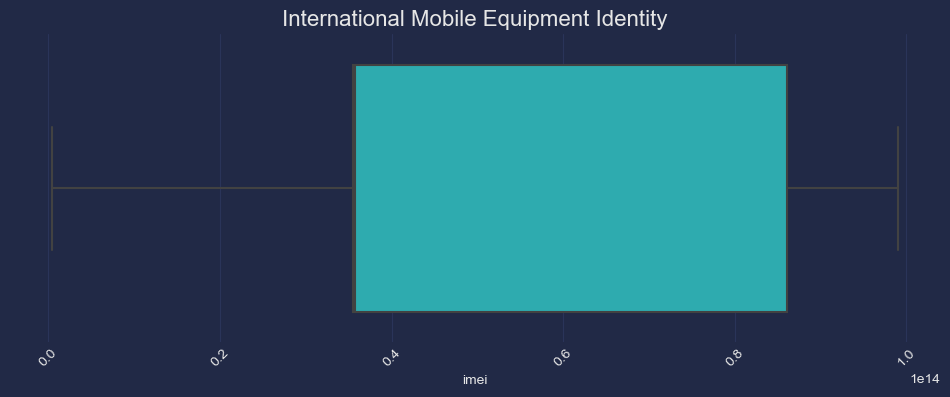

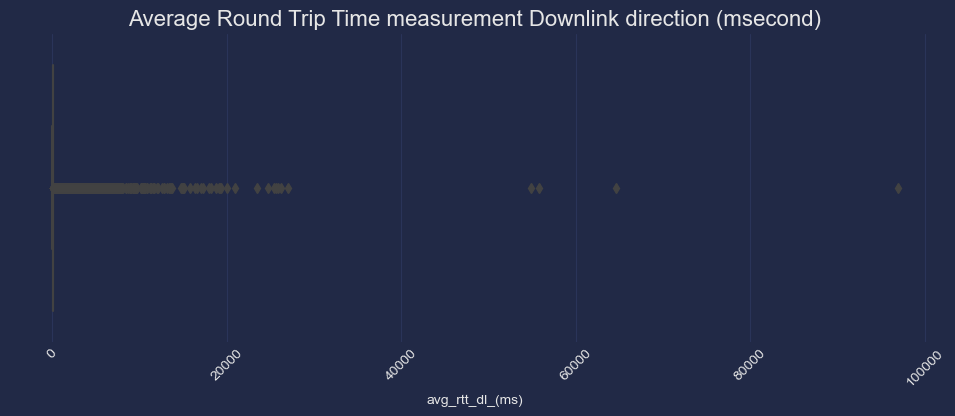

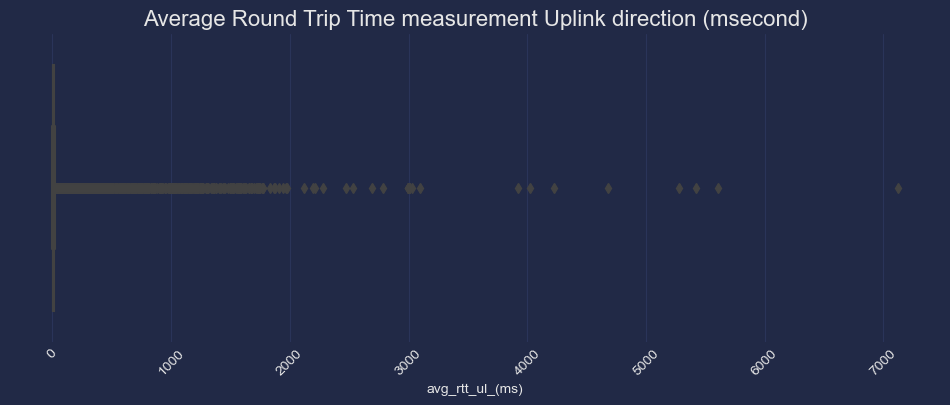

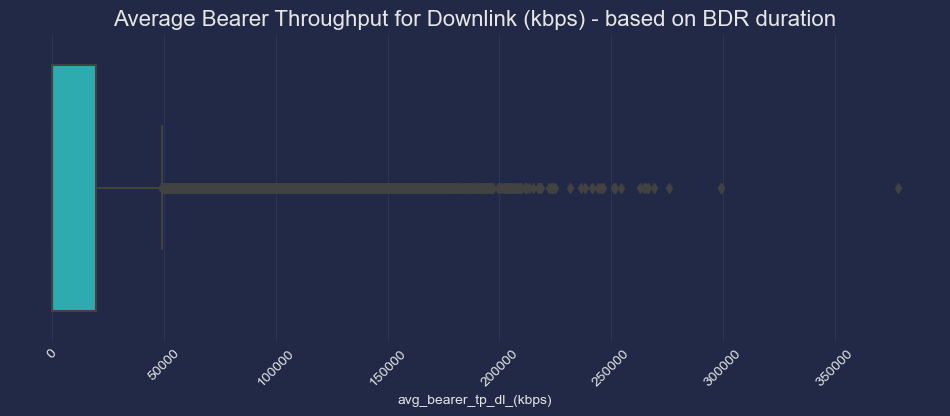

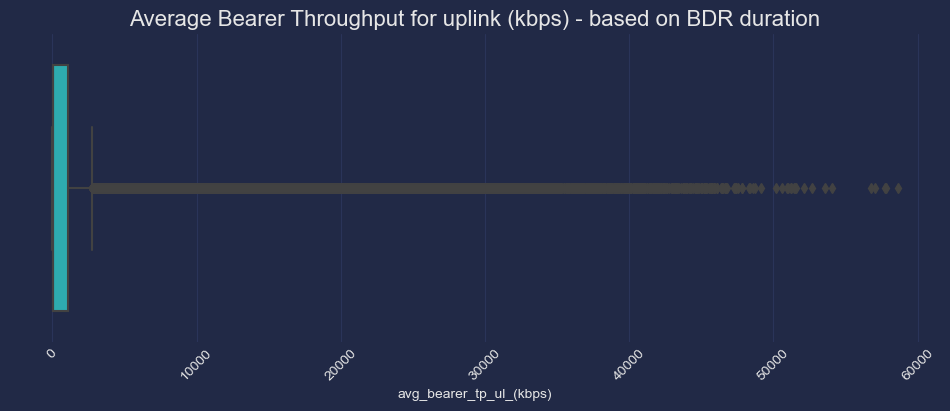

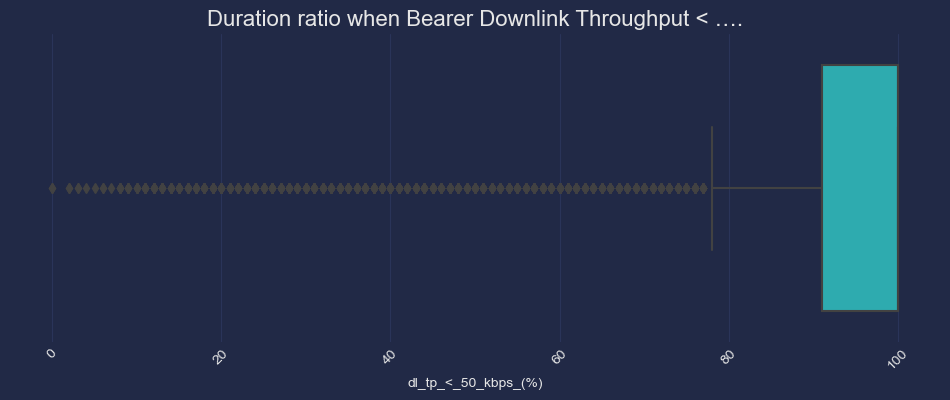

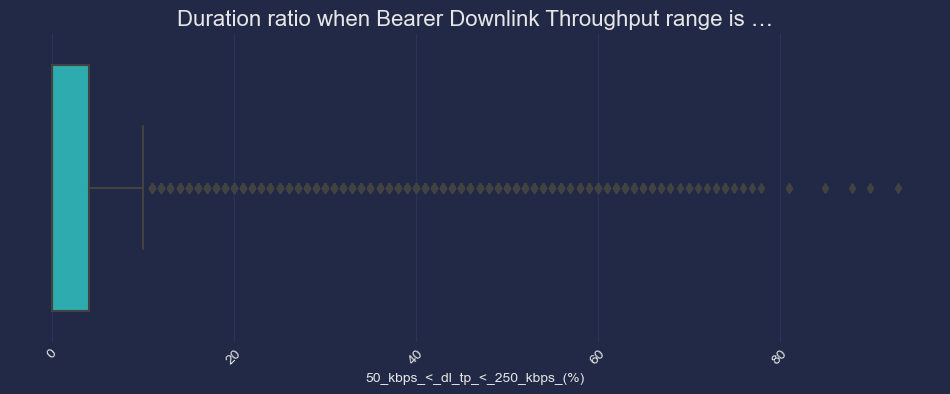

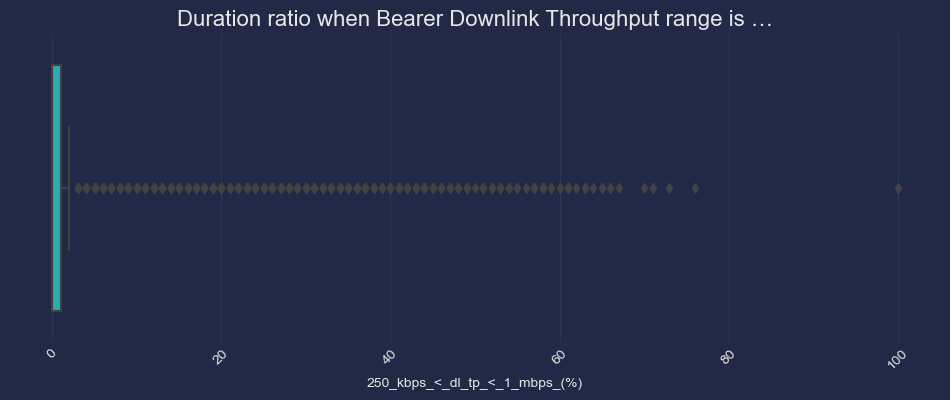

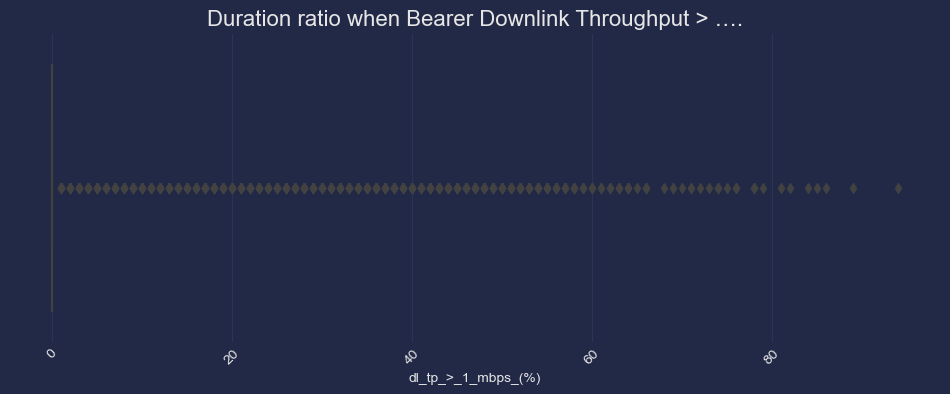

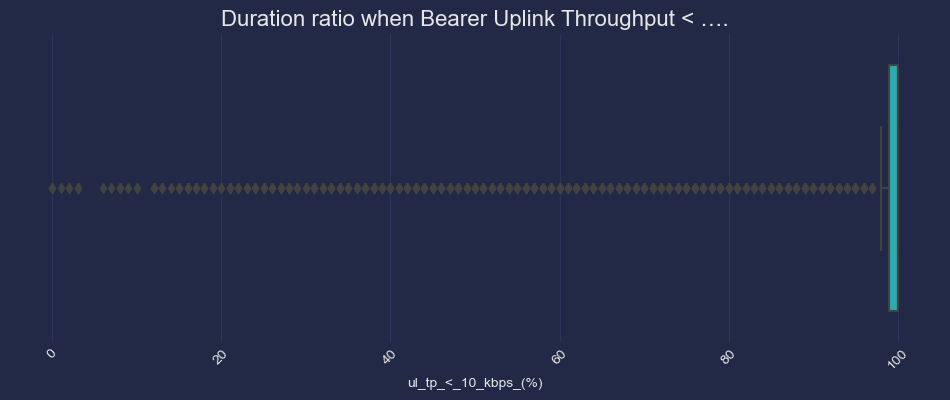

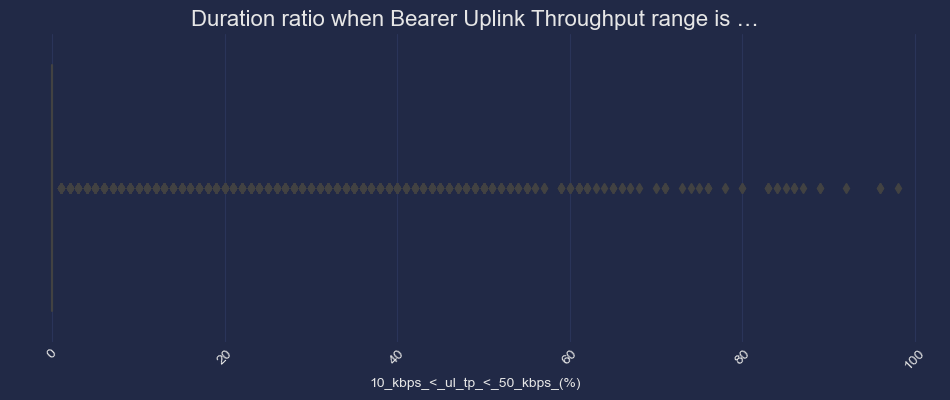

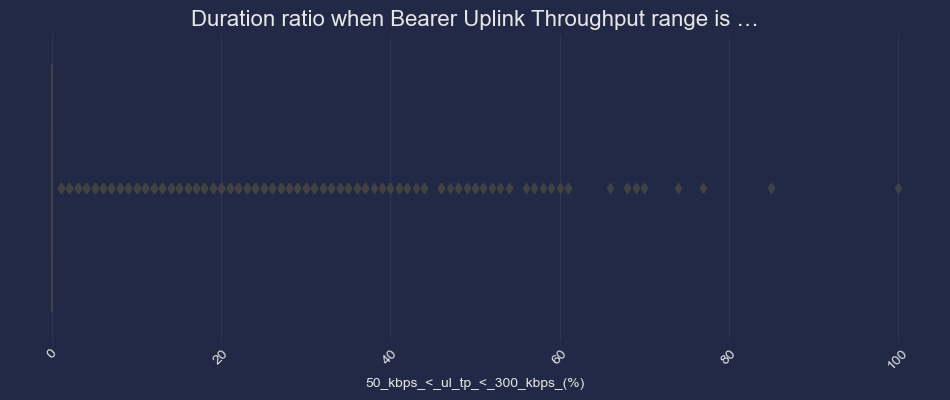

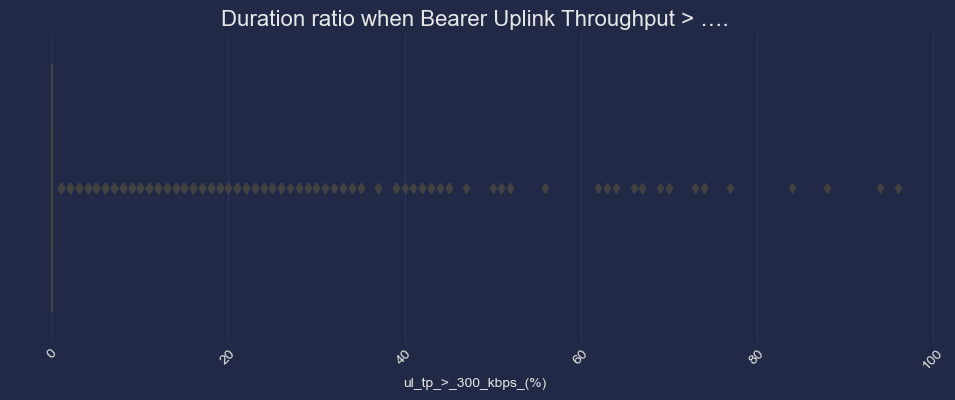

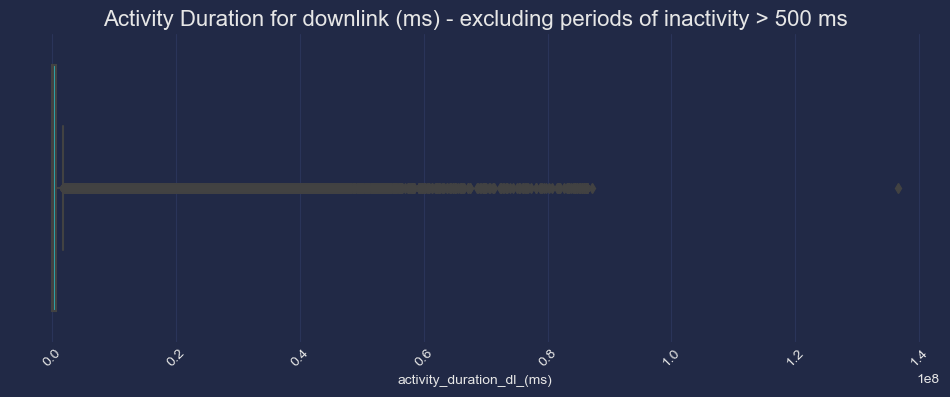

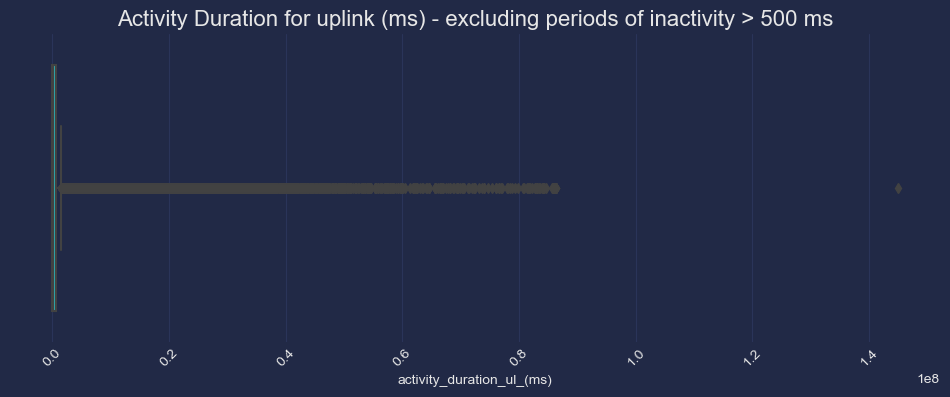

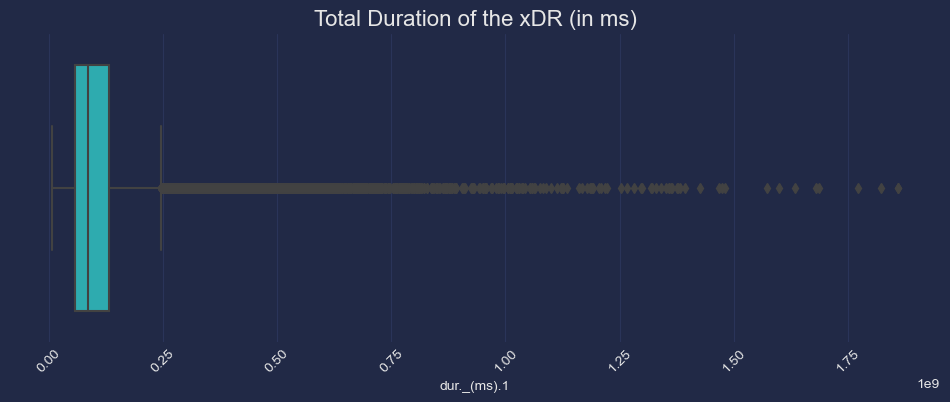

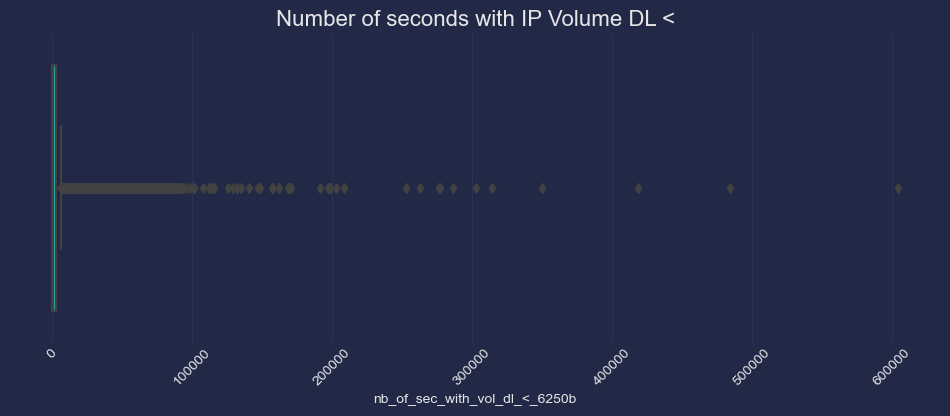

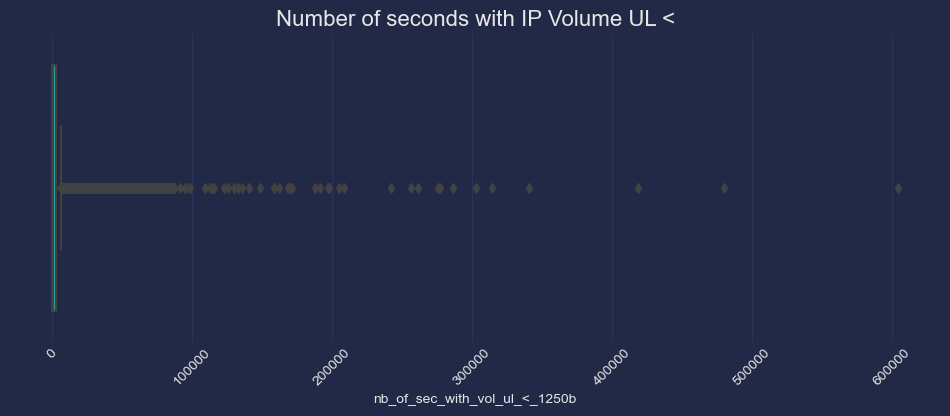

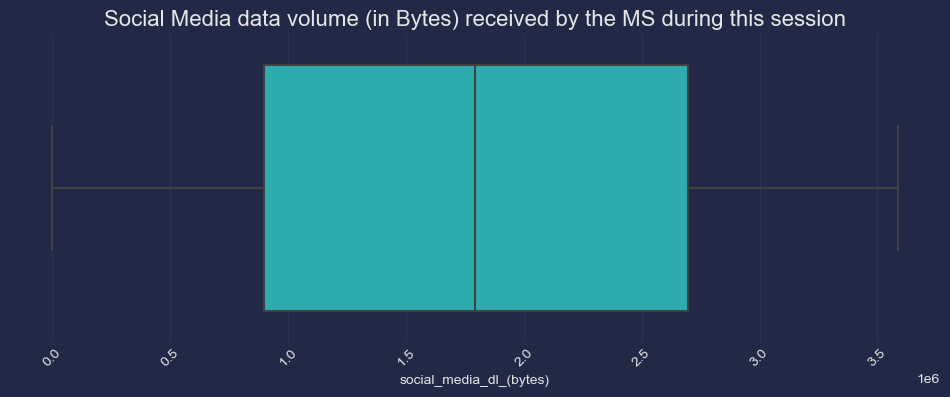

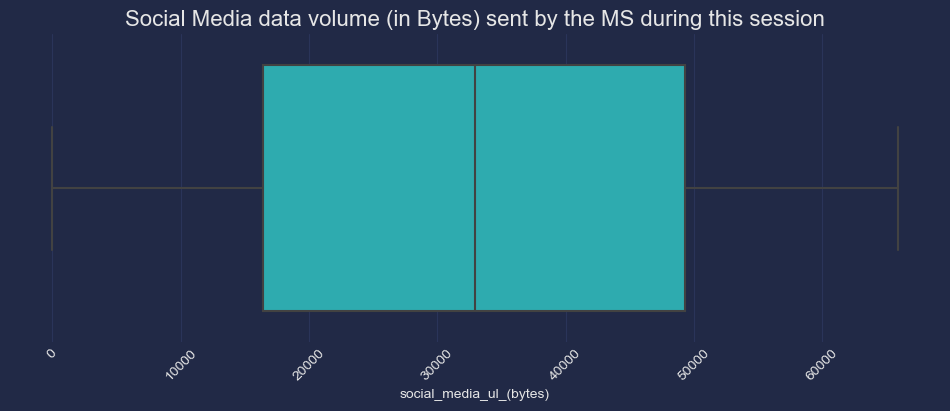

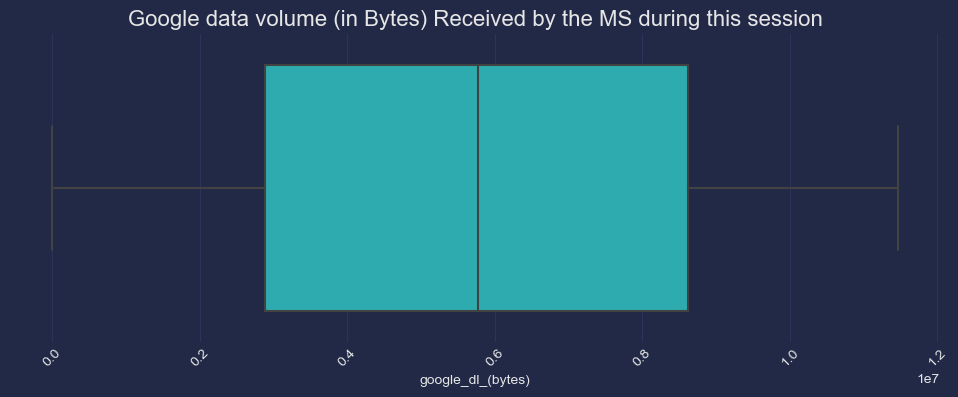

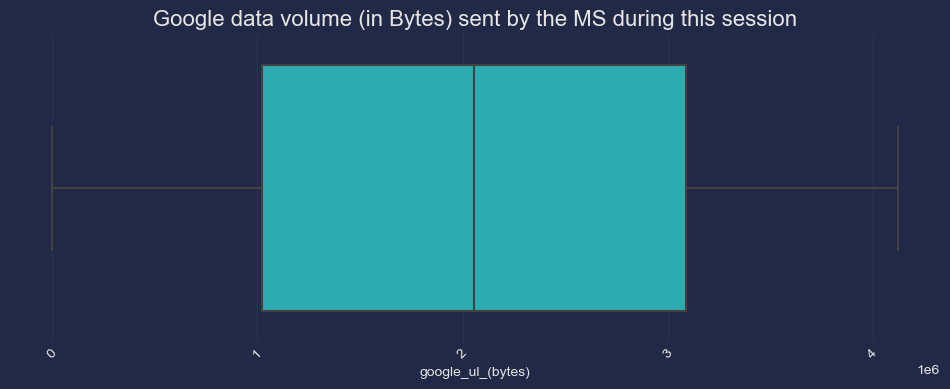

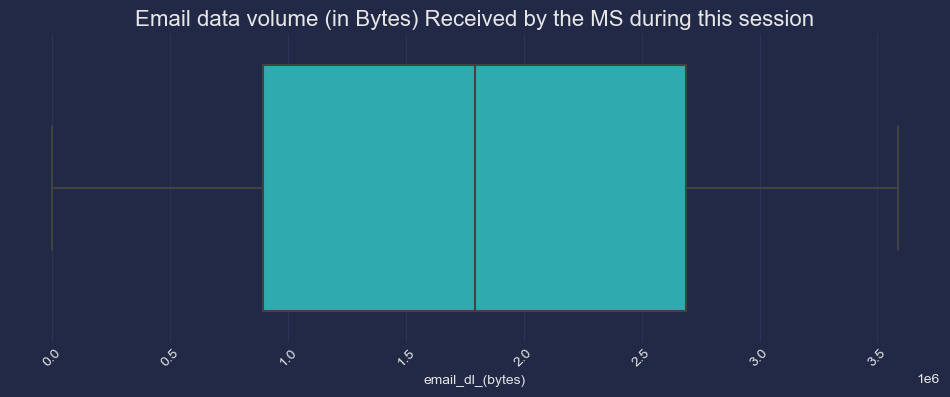

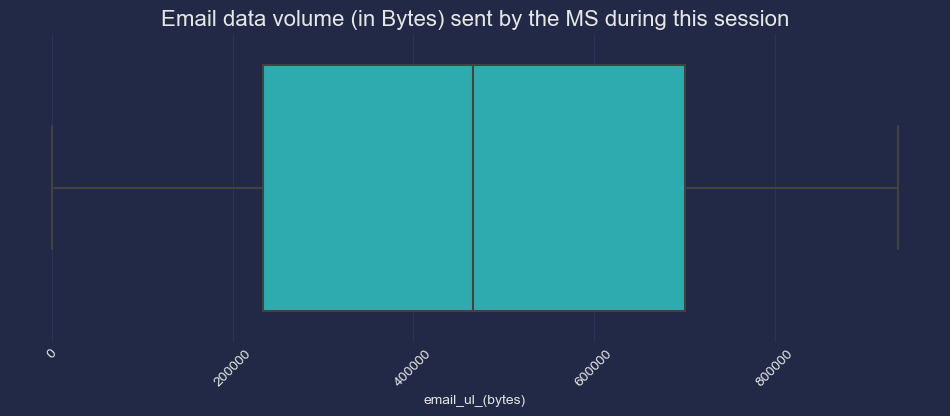

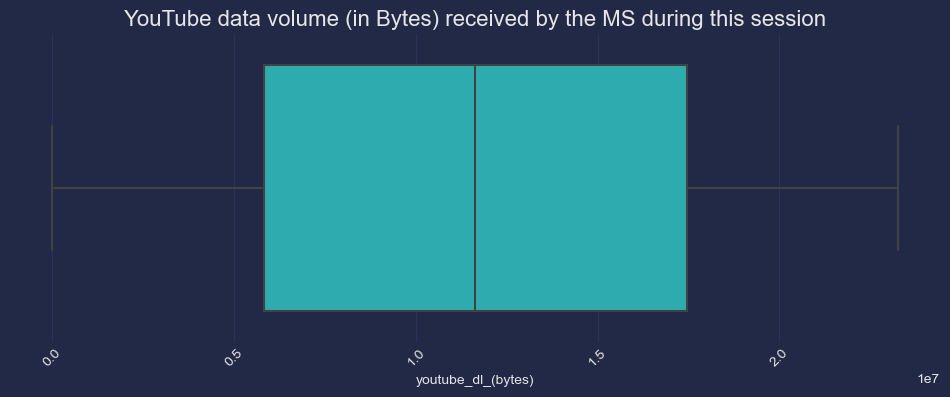

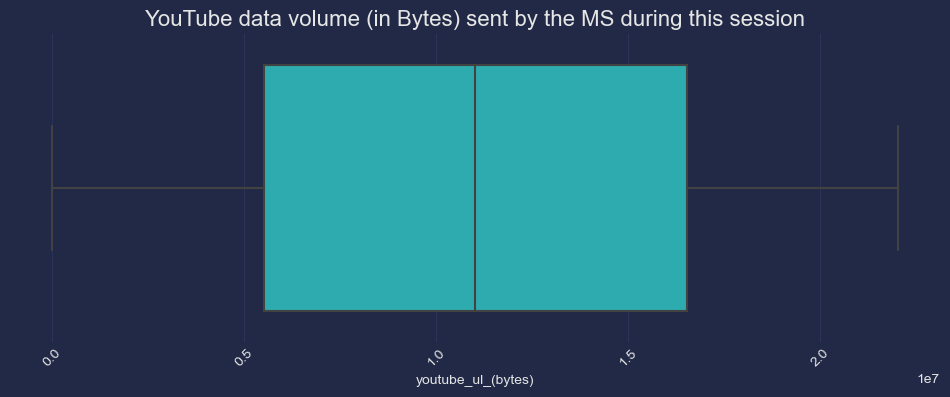

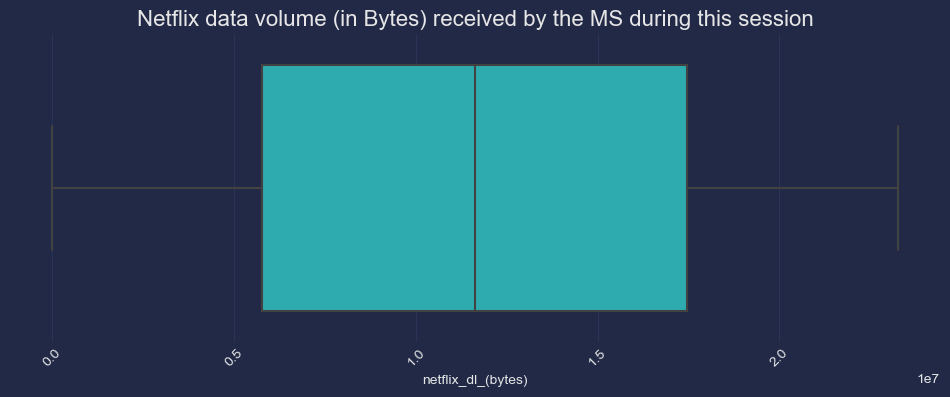

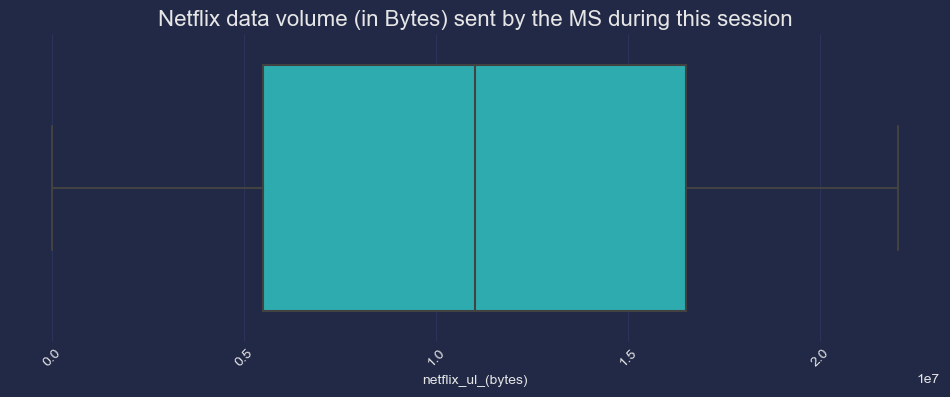

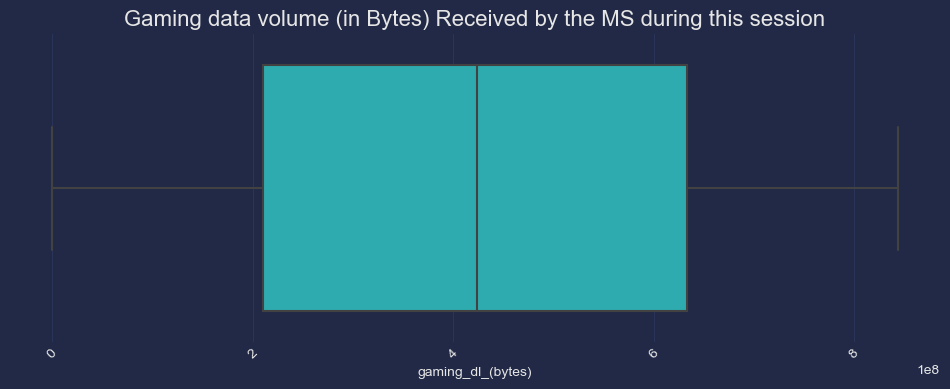

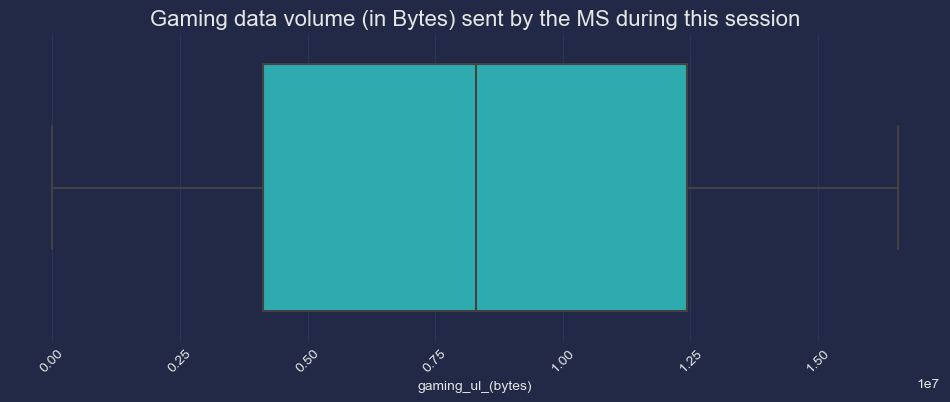

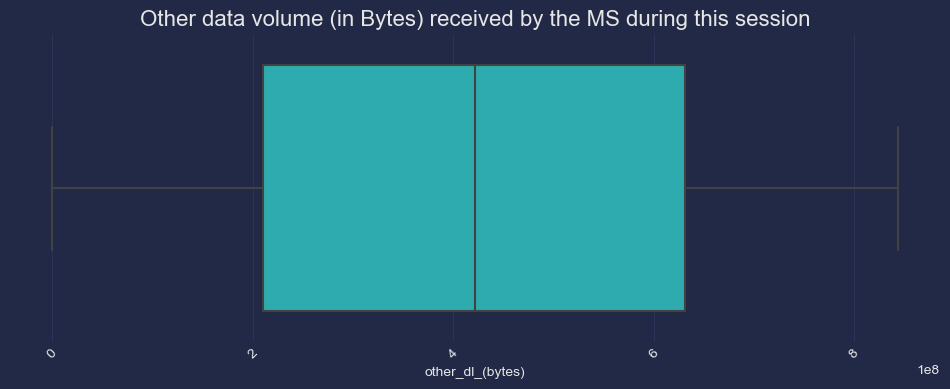

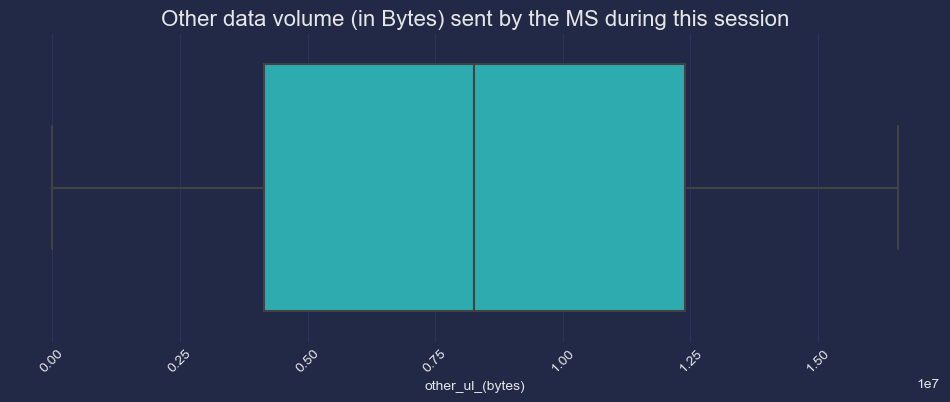

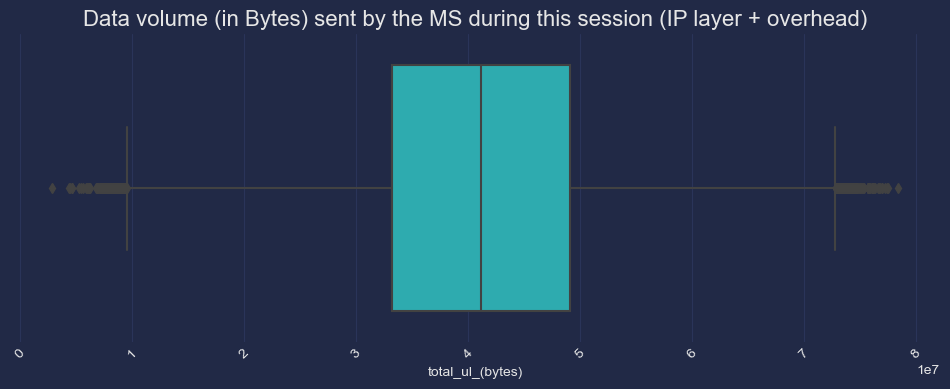

In [92]:
for col in numeric_columns[:-1]:
    boxplot(df_data, col, col_description[col_description['Fields']==col]['Description'].values[0])

#### Form the above boxplots we can see that some of the columns still have outliers. Hence we apply log scaling next.

In [93]:
 def handle_outliers_logscale(df: pd.DataFrame, cols):
    for col in cols:
        df[col] = [np.log(x) for x in df[col]]
    return df

In [94]:
logscale_df = handle_outliers_logscale(df_data, num_cols)

In [95]:
# outliers_dict = outlier.calculate_num_outliers_zscore(df, num_cols)
for col in num_cols:
    print(f"Z-score of {col}", num_outliers(logscale_df[col]) )

Z-score of dur._(ms) 500
Z-score of avg_rtt_dl_(ms) 0
Z-score of avg_rtt_ul_(ms) 0
Z-score of avg_bearer_tp_dl_(kbps) 0
Z-score of avg_bearer_tp_ul_(kbps) 0
Z-score of dl_tp_<_50_kbps_(%) 0
Z-score of 50_kbps_<_dl_tp_<_250_kbps_(%) 0
Z-score of 250_kbps_<_dl_tp_<_1_mbps_(%) 0
Z-score of dl_tp_>_1_mbps_(%) 0
Z-score of ul_tp_<_10_kbps_(%) 0
Z-score of 10_kbps_<_ul_tp_<_50_kbps_(%) 0
Z-score of 50_kbps_<_ul_tp_<_300_kbps_(%) 0
Z-score of ul_tp_>_300_kbps_(%) 0
Z-score of activity_duration_dl_(ms) 0
Z-score of activity_duration_ul_(ms) 0
Z-score of dur._(ms).1 500
Z-score of nb_of_sec_with_vol_dl_<_6250b 3
Z-score of nb_of_sec_with_vol_ul_<_1250b 6
Z-score of social_media_dl_(bytes) 2752
Z-score of social_media_ul_(bytes) 0
Z-score of google_dl_(bytes) 2811
Z-score of google_ul_(bytes) 2766
Z-score of email_dl_(bytes) 2740
Z-score of email_ul_(bytes) 2728
Z-score of youtube_dl_(bytes) 2750
Z-score of youtube_ul_(bytes) 2808
Z-score of netflix_dl_(bytes) 2767
Z-score of netflix_ul_(bytes) 

Data needs further preprocessing as there are some outliers in the data

In [96]:
outlier_columns = []
for col in num_cols:
    num = num_outliers(logscale_df[col])
    if num > 0:
        outlier_columns.append(col)

In [97]:
len(outlier_columns)

19

In [98]:
df_log = logscale_df.copy()

Scaling the data

In [99]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
scaled_data = logscale_df.copy()

scaled_data.sample(5)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
78951,7.349883e+18,4/27/2019 5:15,913.0,4/28/2019 4:34,178.0,11.337846,2.082017e+14,3.367004e+10,3.530401e+13,D10400B,...,16.841909,16.817809,16.573413,16.348293,17.536191,15.607638,19.740192,13.959605,17.526253,18.265182
27668,7.277826e+18,4/24/2019 2:41,530.0,4/26/2019 2:41,429.0,12.059844,2.082014e+14,3.369897e+10,8.637690e+13,D87887C,...,13.690406,12.545462,15.681061,16.744561,20.252853,16.620730,20.268776,15.458490,17.634024,20.284201
93868,1.304243e+19,4/27/2019 15:52,311.0,4/28/2019 0:28,37.0,10.340354,2.082018e+14,3.360980e+10,3.568081e+13,T93944A,...,16.262710,16.512559,16.687998,16.826528,19.949761,12.267464,17.832385,15.582043,17.562486,20.040431
127127,7.349883e+18,4/27/2019 16:06,236.0,4/30/2019 3:58,297.0,12.280744,2.082003e+14,3.366804e+10,3.530641e+13,T70821C,...,16.879450,15.519620,16.591020,15.833586,20.139632,15.012246,19.906067,16.130596,17.137926,20.224125
126320,1.311448e+19,4/27/2019 8:51,617.0,4/30/2019 7:05,581.0,12.440465,2.082014e+14,3.376350e+10,3.563971e+13,L74520A,...,15.368990,15.821137,16.553236,15.996018,16.979926,16.452559,19.444611,16.535852,17.704707,17.724419


In [100]:
scaled_data = minmax_scaler.fit_transform(df_log[outlier_columns])

In [101]:
scaled_data

array([[0.99651593, 0.99651589, 0.40275853, ..., 0.94576164, 0.77119693,
        0.77852565],
       [0.94444627, 0.9444449 , 0.51672331, ..., 0.991811  , 0.88642727,
        0.93320646],
       [0.94400557, 0.94400423, 0.49742255, ..., 0.8823172 , 0.6877282 ,
        0.75811728],
       ...,
       [0.471327  , 0.4713148 , 0.34890246, ..., 0.96724248, 0.75568952,
        0.9131115 ],
       [0.47070557, 0.47069354, 0.28255416, ..., 0.78791719, 0.70605367,
        0.81685699],
       [0.44821852, 0.44820682, 0.39914613, ..., 0.94022364, 0.80533835,
        0.85887727]])

In [102]:
len(df_log)

150001

In [103]:
len(outlier_columns)

19

In [104]:
df_log = pd.DataFrame(scaled_data, columns=outlier_columns)

In [105]:
df_log

,dur._(ms),dur._(ms).1,nb_of_sec_with_vol_dl_<_6250b,nb_of_sec_with_vol_ul_<_1250b,social_media_dl_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,0.996516,0.996516,0.402759,0.403107,0.933252,0.821662,0.916788,0.999492,0.853214,0.970502,0.822514,0.921154,0.938287,0.912787,0.988555,0.872215,0.945762,0.771197,0.778526
1,0.944446,0.944445,0.516723,0.520565,0.950701,0.891220,0.893910,0.860230,0.914920,0.989326,0.988470,0.982026,0.981643,0.974370,0.788814,0.962224,0.991811,0.886427,0.933206
2,0.944006,0.944004,0.497423,0.491597,0.940048,0.972997,0.937094,0.976916,0.974698,0.987317,0.967048,0.978865,0.904660,0.897724,0.702334,0.942217,0.882317,0.687728,0.758117
3,0.938611,0.938609,0.212841,0.400609,0.863819,0.978094,0.972345,0.926719,0.969794,0.993545,0.969493,0.961585,0.775449,0.995798,0.966299,0.990469,0.977834,0.820953,0.986552
4,0.903820,0.903818,0.481431,0.481055,0.886985,0.944442,0.928512,0.950520,0.871035,0.967557,0.987831,0.976847,0.702620,0.963140,0.876788,0.965772,0.985008,0.785599,0.904707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0.437127,0.437115,0.406205,0.408197,0.997275,0.987203,0.973084,0.668316,0.970037,0.972121,0.948863,0.980127,0.991606,0.962977,0.953127,0.554021,0.982352,0.907210,0.906526
149997,0.470816,0.470804,0.349621,0.347441,0.966294,0.850084,0.955131,0.951260,0.868094,0.960249,0.920286,0.986086,0.997513,0.976678,0.900204,0.986418,0.835902,0.790209,0.937356
149998,0.471327,0.471315,0.348902,0.351735,0.916143,0.900127,0.970976,0.931377,0.956773,0.997993,0.798157,0.935897,0.889971,0.966897,0.983094,0.844162,0.967242,0.755690,0.913111
149999,0.470706,0.470694,0.282554,0.331045,0.881162,0.907849,0.989789,0.961790,0.968745,0.925338,0.920455,0.852845,0.961545,0.931434,0.850225,0.997217,0.787917,0.706054,0.816857


In [106]:
outlier_columns = []
df_log_cols = df_log.columns
for col in df_log_cols:
    num = num_outliers(df_log[col])
    if num > 0:
        outlier_columns.append(col)

In [107]:
len(outlier_columns)

19

In [108]:
for col in outlier_columns:
    print(f"Outliers from Z-scores method of {col}", num_outliers(logscale_df[col]) )

Outliers from Z-scores method of dur._(ms) 500
Outliers from Z-scores method of dur._(ms).1 500
Outliers from Z-scores method of nb_of_sec_with_vol_dl_<_6250b 3
Outliers from Z-scores method of nb_of_sec_with_vol_ul_<_1250b 6
Outliers from Z-scores method of social_media_dl_(bytes) 2752
Outliers from Z-scores method of google_dl_(bytes) 2811
Outliers from Z-scores method of google_ul_(bytes) 2766
Outliers from Z-scores method of email_dl_(bytes) 2740
Outliers from Z-scores method of email_ul_(bytes) 2728
Outliers from Z-scores method of youtube_dl_(bytes) 2750
Outliers from Z-scores method of youtube_ul_(bytes) 2808
Outliers from Z-scores method of netflix_dl_(bytes) 2767
Outliers from Z-scores method of netflix_ul_(bytes) 2755
Outliers from Z-scores method of gaming_dl_(bytes) 2759
Outliers from Z-scores method of gaming_ul_(bytes) 2782
Outliers from Z-scores method of other_dl_(bytes) 2825
Outliers from Z-scores method of other_ul_(bytes) 2799
Outliers from Z-scores method of total_u

<AxesSubplot:>

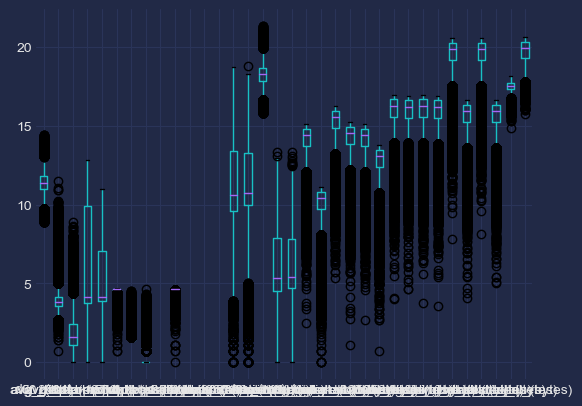

In [109]:
logscale_df[num_cols].boxplot()

Most of the outliers have been handled

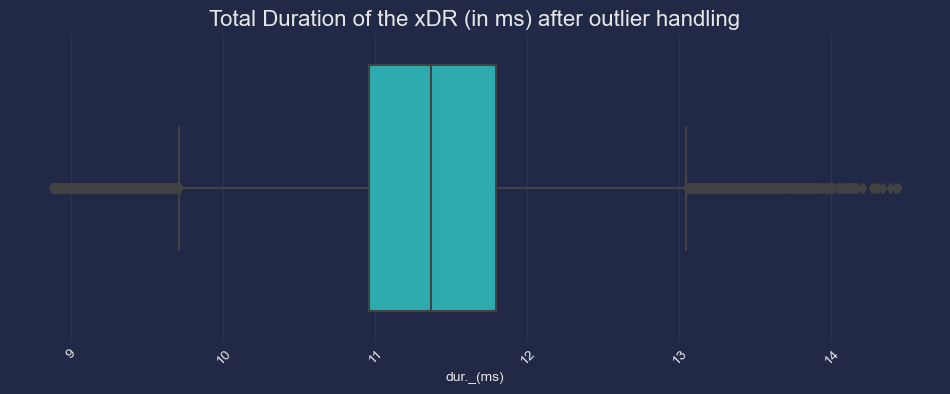

In [110]:
boxplot(logscale_df, 'dur._(ms)', 'Total Duration of the xDR (in ms) after outlier handling')

In [111]:
df_log.describe()

,dur._(ms),dur._(ms).1,nb_of_sec_with_vol_dl_<_6250b,nb_of_sec_with_vol_ul_<_1250b,social_media_dl_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
count,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000
mean,0.439023,0.439011,0.449435,0.458723,0.920838,0.908895,0.928964,0.919527,0.923301,0.923116,0.918437,0.924240,0.925019,0.921345,0.920386,0.919480,0.913696,0.792328,0.813121
std,0.131061,0.131063,0.170886,0.161934,0.079222,0.091331,0.071060,0.080411,0.076611,0.076958,0.081745,0.075821,0.074999,0.078754,0.079740,0.080658,0.086596,0.092031,0.156937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374827,0.374812,0.336353,0.351036,0.890276,0.873604,0.901494,0.888347,0.893588,0.893543,0.887084,0.894682,0.895803,0.890892,0.889277,0.888433,0.880881,0.740687,0.729090
50%,0.448219,0.448207,0.399146,0.404153,0.945081,0.937084,0.950746,0.944361,0.946591,0.946558,0.943486,0.947668,0.948020,0.945832,0.944860,0.944361,0.940247,0.805338,0.858877
75%,0.525004,0.524993,0.590946,0.585228,0.977341,0.973941,0.979586,0.976891,0.977762,0.977875,0.976554,0.978359,0.978446,0.977462,0.977148,0.976788,0.975011,0.858383,0.937063
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
logscale_df[outlier_columns] = df_log

In [116]:
logscale_df.shape

(150001, 45)

## Now we combine  data volume  received  and sent for different platforms

In [117]:
logscale_df["social_media_(bytes)"] = logscale_df["social_media_dl_(bytes)"] + logscale_df['social_media_ul_(bytes)']
logscale_df["google_(bytes)"] = logscale_df["google_dl_(bytes)"] + logscale_df["google_ul_(bytes)"]
logscale_df['email_(bytes)'] = logscale_df["email_dl_(bytes)"] + logscale_df["email_ul_(bytes)"]
logscale_df['youtube_(bytes)'] = logscale_df["youtube_dl_(bytes)"] + logscale_df["youtube_ul_(bytes)"]
logscale_df['netflix_(bytes)'] = logscale_df["netflix_dl_(bytes)"] + logscale_df["netflix_ul_(bytes)"]
logscale_df["gaming_(bytes)"] = logscale_df["gaming_dl_(bytes)"] + logscale_df["gaming_ul_(bytes)"]
logscale_df['other_(bytes)'] = logscale_df["other_dl_(bytes)"]+logscale_df["other_ul_(bytes)"]
logscale_df['total_data_(bytes)'] = logscale_df['total_dl_(bytes)'] + logscale_df['total_ul_(bytes)']

## Convert data volum from bytes to megabytes

In [118]:
#scaling_factor = 10e+5
#logscale_df['social_media_(megabytes)'] = logscale_df['social_media_(bytes)']/scaling_factor
#logscale_df['google_(megabytes)'] = logscale_df['google_(bytes)']/scaling_factor
#logscale_df['email_(megabytes)'] = logscale_df['email_(bytes)']/scaling_factor
#logscale_df['youtube_(megabytes)'] = logscale_df['youtube_(bytes)']/scaling_factor
#logscale_df['netflix_(megabytes)'] = logscale_df['netflix_(bytes)']/scaling_factor
#logscale_df['gaming_(megabytes)'] = logscale_df['gaming_(bytes)']/scaling_factor
#logscale_df['total_data_(megabytes)'] = logscale_df['total_data_(bytes)']/scaling_factor
#logscale_df['other_(megabytes)'] = logscale_df['other_(bytes)']/scaling_factor

Save the data



In [119]:
# Saving the cleaned data

In [120]:
logscale_df.to_csv('../data/cleaned_data.csv', index=False)